In [ ]:
# install all the necessary dependencies
!pip install mwapi
!pip install mwedittypes

In [2]:
# import all the necessary dependencies
from datetime import datetime #for date and time strings
from collections import Counter #count frequecy/occurence of data
from matplotlib import pyplot as plt # for plotting chats and graphs
from mwedittypes import SimpleEditTypes
import mwapi
import re #regular expression
import requests  # necessary to make API calls
import asyncio #for async requests
import aiohttp 
import numpy as np
import pandas as pd
import seaborn as sns

# Recent Edits

The [RecentChanges API](https://www.mediawiki.org/wiki/API:RecentChanges) can help you fetch all the recent changes made to a wiki. Here's how you would use [python-mwapi](https://github.com/mediawiki-utilities/python-mwapi#readme), which is a client for the [MediaWiki API](https://www.mediawiki.org/wiki/API:Main_page#Introduction), to get the 3 latest changes made to english wikipedia:

In [3]:
#pagination for 5000 edits

def edit_response() -> list:
    
    """
    a list of dictionary (type:edit) of recentchanges starting from the 16th of October at 16pm made using api: https://en.wikipedia.org synchronously 

    Returns:
        edit_list ([dictionary]): [5000 dictionaries of recentchanges made to Wikipedia which includes title, namespaces,
        ids, revid, old_revid, user, tags, timestamp]
    """
    
    session = mwapi.Session(
        host="https://en.wikipedia.org",
        user_agent="Outreachy round fall 2022"
    )

    params = {
            "action": "query", #fetches information about a wiki page/pages
            "list": "recentchanges",
            "rcprop": "title|ids|user|tags|timestamp",
            "rclimit": 500, #a round of request prints 500 recentchanges
            "rcstart": "2022-10-06T16:00:00Z", #start date of recentchanges
            "rctype": "edit", #the type of changes eg log, edit etc
            "format": "json",
    }
   
    edit_list=[]
    response = session.get(params, continuation=True)  # When continuation=True, session.get returns a generator of responses
    for response_list in response: #loops through response got from api
        
        for response_item in response_list['query']['recentchanges']:
            edit_list.append(response_item)
        if len(edit_list) == 5000: #this ensures we get exactly 5000 responses
            break
            
    return edit_list

edit_list = edit_response()
print(edit_list)

Notice that each of those changes has a "type". For our microtasks, we're only interested in the type "edit". The property "ns" means namespace and all encyclopedia articles belong to the "main namespace" or ns 0. You can read through the API documentation linked above to see how to only get changes with properties that we're interested in.

Using this API, fetch the first 5000 edits made to enwiki articles, starting October 6th, 16:00 UTC and try to find:

* The total number of articles the edits were made to.
* The number of unique users making the edits.
* Top 10 articles by number of edits
* Top 10 users by number of edits.



In [23]:
#The total number of articles the edits were made to
def total_num_articles() -> int:
    
    """
    total number of articles the edits were made where ns(namespaces) is equal to 0

    Returns:
        len(new_list) -> (number): counts the number of edits made to articles in wikipedia
    """
    
    edit_list = edit_response() 
    new_list = [response_item for response_item in edit_list if response_item["ns"] == 0] #list comprehension with a conditional statement for edits made to articles only

    return len(new_list)
    
total_num_articles()

2927

In [24]:
#The number of unique users making the edits

def num_unique_users(edit_list) -> int:
    
    """
    total number of uniques users that made edits in wikipedia. unique users are allocated ip addresses
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        len(uniqueusers_list) -> (number): counts the number of unique users that made edits to wikipedia 
    """
    
    uniqueusers_list=[]
    for response_item in edit_list:
        
        unique_user_ipv4 = re.search("^(([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.){3}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])$", response_item['user']) 
        unique_user_ipv6 = re.search("(?:^|(?<=\s))(([0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,7}:|([0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,5}(:[0-9a-fA-F]{1,4}){1,2}|([0-9a-fA-F]{1,4}:){1,4}(:[0-9a-fA-F]{1,4}){1,3}|([0-9a-fA-F]{1,4}:){1,3}(:[0-9a-fA-F]{1,4}){1,4}|([0-9a-fA-F]{1,4}:){1,2}(:[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:((:[0-9a-fA-F]{1,4}){1,6})|:((:[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(:[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(ffff(:0{1,4}){0,1}:){0,1}((25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])|([0-9a-fA-F]{1,4}:){1,4}:((25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9]))(?=\s|$)", response_item['user'])
        #unique_user_ipv6 = re.search('''(([0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,7}:|([0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,5}(:[0-9a-fA-F]{1,4}){1,2}|([0-9a-fA-F]{1,4}:){1,4}(:[0-9a-fA-F]{1,4}){1,3}|([0-9a-fA-F]{1,4}:){1,3}(:[0-9a-fA-F]{1,4}){1,4}|([0-9a-fA-F]{1,4}:){1,2}(:[0-9a-fA-F]{1,4}){1,5}|[0-9a
        #-fA-F]{1,4}:((:[0-9a-fA-F]{1,4}){1,6})|:((:[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(:[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(ffff(:0{1,4}){0,1}:){0,1}((25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])|([0-9a-fA-F]{1,4}:){1,4}:((25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9]))''', response_item['user'])
        #unique users are users not registerd so inorder to keep track of activities they are saved with their ip numbers/addresses that is, represent their usernames and a regex that extract ipv4, ipv6, and ipv6 compressed numbers i.e 8-bit and 32-bit. other suggestions to get ip addresses is a socket python library.
        
        if unique_user_ipv4: #conditional statement for ipv4 addresses
            uniqueusers_list.append(response_item['user'])
        elif unique_user_ipv6: #conditional statement for all ipv6 addresses including compressed addresses
            uniqueusers_list.append(response_item['user'])
    return len(uniqueusers_list)

editlist = edit_response()
unique = num_unique_users(editlist)
print(unique)

In [25]:
#Top 10 articles by number of edits

def top_articles(edit_list) -> list:
    
    """
    top 10 highest number of articles that edits were made where the namespace is 0
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        top_articlelist -> ([tuple]): counts and selects the top 10 articles with the most edits and 
        returns the name of the article and their occurences
    """
    
    article_list = Counter([response_item['title'] for response_item in edit_list if response_item["ns"] == 0]) #counts the frequency of edits made on an article by the title of articles 
    top_articlelist = article_list.most_common(10) # truncates the previous result to only top/highest 10
    
    return top_articlelist
    
editlist = edit_response()
top = top_articles(editlist)
print(top)

In [26]:
#Top 10 users by number of edits

def top_editusers(edit_list) -> list:
    
    """
    top 10 highest number of users that edits were made 
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        top_userslist -> ([tuple]): counts and selects the top 10 user with the most edits and returns 
        the name of the user and their occurences
    """
  
    users_list = Counter([response_list['user'] for response_list in edit_list]) # counts the frequency of users making these changes of articles and truncates to only top/highest 10
    top_userslist = users_list.most_common(10) # truncates the previous result to only top/highest 10
    
    return top_userslist

editlist = edit_response()
users=top_editusers(editlist)
print(users)

The mwapi client also provides an [AsyncSession](https://github.com/mediawiki-utilities/python-mwapi#asynchronous-single-query) for making asynchronous requests. This can help speed up the process of getting data from an API in some cases. Try using the AsyncSession to query the recentchanges API. 

* Do you see a difference in the total execution time?
* What do you think causes this difference?

In [8]:
#pagination for 5000 recentchanges using an async session

async def query():
    async with aiohttp.ClientSession() as s:
        session = mwapi.AsyncSession(
                    'https://en.wikipedia.org',
                    user_agent='mwapi async demo',
                    session=s)
        params = {
            "action": "query",
            "list": "recentchanges",
            "rcprop": "title|ids|user|tags|timestamp",
            "rctype": 'edit',
            "rclimit": 500,
            "rcstart": "2022-10-06T16:00:00Z",
            "format": "json",
        }

        response = await asyncio.create_task(
            session.get(params,
                continuation=True)
        )
        response_list = []
        async for response_item in response:
            if 'query' in response_item:
                for page in response_item['query']['recentchanges']:
                    response_list.append(page)
                if len(response_list) == 5000:
                    break
        
        print(response_list)

loop = asyncio.get_event_loop() #this runs dfferently on python but on jupyter notebook, a loop event and a create task has to be created in order to run

loop.create_task(query())

<Task pending name='Task-4' coro=<query() running at /tmp/ipykernel_1829/3198112381.py:3>>


# Answer

The AsyncSession of the mwapi client is a little bit slower than the synchronous (single) session. 

Asyncio is, fundamentally: 

1. Parallelism (multiprocessing) which performing multiple operations at the same time by spreading tasks over a CPU or core. 
2. Threading further explains its model of exceution - concurrency that is, tasks running in an overlapping manner. 

This gives rise to a Coroutines(generator-based) (a central feature of async IO) can be scheduled concurrently, but they are not inherently concurrent so your process is not idle. 

In the above, there is only one coroutine so this runs normally and awaits the response from the api call that is, it works synchronously. The wikipedia server can not output more than 500 respose per query, that is, it has some limit. Note Some APIs have limits for number of quesies per second. And if server has limits then you can't it make faster. 

However, splitting processes into 2 coroutines (await asyncio.gather(loop.create_task(function A()), loop.create_task(function B()))) and make them run in parallel helps will speed the process up but this is not applicable here. 

# Damaging Edits

On Wikipedia, reverting means undoing or otherwise negating the effects of one or more edits, which restores the page to a previous version. Edits can get reverted for being unsourced, biased or, malicious among other reasons. 

Assuming that most damaging edits will get reverted, you can use the [ORES API](https://www.mediawiki.org/wiki/ORES#API_usage) to predict how many of the edits that you've sampled are likely to be reverted using the "damaging" model. Once you have the scores for all edits, try summarizing them using statistics.


# Answers

Confidence, in statistics, is another way to describe probability. For example, if you construct a confidence interval with a 95% confidence level, you are confident that 95 out of 100 times the estimate will fall between the upper and lower values specified by the confidence interval. A confidence level of 90%(0.9) - 100%(1). 

A prediction value that returns boolean values, returns true that the edit made maybe damaging and a probability value greater than 0.9 means it is more likely damaging and this edit is likely to be reverted.

In [4]:
# damaging scores using ores api

def damaging_scores_statistics(dbname, model_type, threshold) -> list:
    
    """
    number of articles that are likely damaging based on the prediction and probaility using all the recentchanges id using api: https://ores.wikimedia.org/v3/scores/enwiki
    
    Args:
        dbname(string): the name of the database of interest eg enwiki, frwiki etc
        model_type(string): the particular machine learning model of choice eg articlequality, damaging etc
        threshold(number): threshold/confidence level of the damaging scores
        
    Returns:
        damaging_article_list (list): article edit that is likely damaging
    """
    
    edit_list = edit_response() #calling the edit_response function to get the revid
    damaging_article_list=[]
    
    for response_item in edit_list: 
        revid = response_item['revid'] #revision ID 
        
        try:
            REQUEST_LABEL = 'Outreachy 25 Toolhub Microtask'
            USER_INFO = 'Phabricator user: Caseyyy0000'
            headers = {'User-Agent': f'{REQUEST_LABEL} - {USER_INFO}'}
            TOOLS_API_ENDPOINT = "https://ores.wikimedia.org/v3/scores"
            url = f'{TOOLS_API_ENDPOINT}/{dbname}/{revid}/{model_type}' #dbname - name of the database of wikipedia to work with eg. frwiki, enwiki, rev_id - The revision ID to score, model - The name of a model to use when scoring

            response = requests.get(url, headers=headers)
            scores = response.json()['enwiki']['scores'][str(revid)] # get all the scores based on diferent models
            prediction = str(scores[model_type]['score']['prediction']).lower() #the prediction value is changed to a lowercase string to prevent error
            damaging_scores = scores[model_type]['score']['probability'][prediction]
            
            if 'true' in prediction and damaging_scores > threshold: # conditional statement to determine edits that are damaging or not
                #damaging_article_count += 1
                damaging_article_list.append(response_item)
                
        except:
            continue
        
    return damaging_article_list
    
damaging_article_list = damaging_scores_statistics('enwiki', 'damaging', 0.9)
print('likely Damaging edits', ' -> ', len(damaging_article_list))

# Comparing edits

For the revisions that you sampled from Recent Changes, compare each to its parent revision (`old_revid` from RecentChanges response) and try to find some similarities and differences between them. For example, you can try finding:

* If they were made by the same or different users
* How far apart the two edits were made

In addition to comparing the metadata, it can also be helpful to compare the content of the revisions too. One way of doing that would be using the [mwedittypes](https://github.com/geohci/edit-types#mwedittypes) package that helps summarize the changes made by an edit to the content of an article. Here's an example of how to compare the wikitext of two revisions 

In [28]:
#If they were made by the same or different users

def users_count(edit_list):
    
    """
    list of the count/frequency of users (same/different) with the two revisions, also if the revisions were deleted 
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 
        
    Returns:
        userlist -> ([user_count, users_count, hidden_count]): a list containing the same user, different user or users with deleted revisions
    """
    
    user_count = 0
    users__count = 0
    hidden_user = 0
    userlist=[]

    for response_item in edit_list:

        try:

            new_id = response_item['revid']
            old_id = response_item['old_revid']
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare", #compares edits using old and new revision ids(difference between two pages)
                    "fromrev": old_id,
                    "torev": new_id,  
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change

            }

            response = session.get(
                                params
            )

            from_user = response['compare']['fromuser']
            to_user = response['compare']['touser']

            if from_user in to_user: #conditional statement to check if the user that made previous and recent edits are the same
                user_count += 1 #same user

            elif  from_user in 'fromuserhidden': #conditional statement to check If the user has been revision deleted
                hidden_user += 1

            elif to_user in 'touserhidden': #conditional statement to check If the user has been revision deleted
                hidden_user += 1

            else:  #conditional statement to check if the user that made previous and recent edits are the different
                users__count += 1 # different users

        except: 
            continue

            
    userlist.append(user_count)
    userlist.append(users__count)
    userlist.append(hidden_user)
    return userlist  

editlist = edit_response()
user_count, users__count, hidden_user = users_count(editlist)  
print('same user', user_count, '\n', 'different users', users__count, '\n', 'hidden user', hidden_user)


In [29]:
#time difference between both revisions 

def time_difference_revisions(edit_list) -> list:
    
    """
    the time difference between the two revisions and the frequency of articles with the same time difference
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 
        
    Returns:
        labels ([diff_date]): the time difference between both revisions
        values ([counter]): the number/frequency of articles with the same time difference
        
    """
    
    date_list=[]

    for response_item in edit_list:

        try:

            new_id = response_item['revid'] #new revision ID
            old_id = response_item['old_revid'] #new old revision ID
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare",
                    "fromrev": old_id,
                    "torev": new_id,  # no of changes we want
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change
            }

            response = session.get(
                        params
            )

            from_timestamp = response['compare']['fromtimestamp']
            to_timestamp = response['compare']['totimestamp']

            past_date = datetime.strptime(from_timestamp, "%Y-%m-%dT%H:%M:%S%fZ") #formats string representation of date and time for ease of arithmetic operation
            present_date = datetime.strptime(to_timestamp, "%Y-%m-%dT%H:%M:%S%fZ")
            diff_date = (present_date - past_date).days # gets only the number of days in this time difference 

            date_list.append(diff_date)

        except: 
            continue

    labels = []
    values = []
    highest_dates = Counter(date_list).most_common(10) 

    for label, value in highest_dates: #the number of articles with the same date difference and the date difference
        labels.append(label) 
        values.append(value)

    return labels, values
    '''fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(labels, values, color ='maroon', width = 0.2)

    plt.xlabel("Days between each edit")
    plt.ylabel("No. of articles")
    plt.title("Distribution of the top ten time difference(in days) between edits")
    plt.show()
    
    
    explode = (0.0, 0.1, 0.0, 0.1, 0.2, 0.2, 0.1, 0.3, 0.1, 0.2) # Creating explode data
    colors = ( "orange", "cyan", "brown","pink", "indigo", "red", "olive","magenta", "indigo", "blue") # Creating color parameters
    wp = { 'linewidth' : 1, 'edgecolor' : "green" } # Wedge properties

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} articles)".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(values, autopct = lambda pct: func(pct, values), explode = explode, labels = labels, shadow = True,
    colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
    ax.legend(wedges, labels, title ="Days between each edit", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))  # Adding legend
    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title("Distribution of the top ten time difference(in days) between edits")

    plt.show() # show plot'''
    
    
editlist = edit_response()
label, value = time_difference_revisions(editlist)
print(label, value) 

In [30]:

def size_revision(edit_list):
    
    """
    a list of counting any size(html in bytes) difference between the two revisions
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        size_list -> ([size_count, sizes_count, samesizes_count]): a list containing the number of revisions with either changed (increased or decreased) or unchanged size
    """
    
    size_count = 0
    sizes_count = 0
    samesize_count = 0
    size_list=[]
    
    for response_item in edit_list:

        try:
            new_id = response_item['revid']
            old_id = response_item['old_revid']
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare",
                    "fromrev": old_id,
                    "torev": new_id,  
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change
            }

            response = session.get(
                            params
            )

            from_size = response['compare']['fromsize']
            to_size = response['compare']['tosize']

            if from_size > to_size: #conditional statement to check if the size decreased from the previous and recent edits
                size_count += 1

            elif from_size < to_size: #conditional statement to check if the size increased from the previous and recent edits
                sizes_count += 1

            else: #conditional statement to check if the size remained the same from the previous and recent edits
                samesize_count += 1

        except: 
            continue

    size_list.append(size_count)
    size_list.append(sizes_count)
    size_list.append(samesize_count)
    return size_list
    
editlist = edit_response()    
sizelist = size_revision(editlist)
print(sizelist)
    

In [13]:
# title change between both revisions
def title_diff_revision() -> int:
    
    """
    counts any title difference between the two revisions
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        title_count -> (number), titles_count -> (number): the number of revisions with either changed or unchanged titles
        
    """

    edit_list = edit_response()
    title_count = 0
    titles_count = 0
    
    for response_item in edit_list:
        
        try:
            new_id = response_item['revid']
            old_id = response_item['old_revid']
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare",
                    "fromrev": old_id,
                    "torev": new_id,  
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change
            }

            response = session.get(
                            params
            )

            from_title = response['compare']['fromtitle']
            to_title = response['compare']['totitle']
                
            if from_title in to_title: # check if the older and present titles are the same
                title_count += 1
                    
            else: 
                titles_count += 1
                
        except: 
            continue
                
    return title_count, titles_count
    
title_count, titles_count = title_diff_revision()
print('same title', title_count, '\n', 'different title', titles_count)

In [14]:
def namespace_diff_revision() -> int:
    
    """
    counts namespaces between the two revisions
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        namespace -> (number), namespaces -> (number): the number of revisions with either changed or unchanged namespace 
        e.g, from article(ns = 0) to category(ns = 14)
        
    """

    edit_list = edit_response()
    namespace = 0
    namespaces = 0
    
    for response_item in edit_list:
        
        try:
            new_id = response_item['revid']
            old_id = response_item['old_revid']
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare",
                    "fromrev": old_id,
                    "torev": new_id,  # no of changes we want
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change
            }

            response = session.get(
                    params
            )

            from_ns = response['compare']['fromns']
            to_ns = response['compare']['tons']
                
            if from_ns == to_ns: #conditional statement to check if there was a namespace change from the previous and recent edits
                namespace += 1
                    
            else: 
                namespaces += 1
                    
        except: 
            continue
                
    return namespace, namespaces
    
namespace, namespaces = namespace_diff_revision()
print('same namespace', namespace, '\n', 'different namespace', namespaces)

In [15]:
def content_revision_difference(edit_list):
    
    """
    gives the content difference of the revisions made of the likely damaging edits made to wikipedia
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 
    
    Returns:
        difference_detail (string): the content difference of the likely damaging edits made to wikipedia
        
    """

    for response_item in edit_list:
        try:
            revid = response_item['revid']
            article_title = response_item['title']
            
            
            session = mwapi.Session(
                        host="https://en.wikipedia.org",
                        user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "query",
                    "prop": "revisions",
                    "titles": article_title,
                    "rvslots": "*",
                    "rvprop": "content",
                    "rvstartid": revid,
                    "rvdir": "older",
                    "rvlimit": 2,
                    "format": "json",
                    "formatversion": "2",
            }
            '''alternatively, for the params, specifying rvendid(while excluding the rvdir) 
            from the edit_response that = is, response_item['old_revid']  still gives the same response.'''

            response = session.get(
                    params
            )
            
            prev_wikitext = response['query']['pages'][0]['revisions'][0]['slots']['main']['content']
            curr_wikitext = response['query']['pages'][0]['revisions'][1]['slots']['main']['content']
            
            et = SimpleEditTypes(prev_wikitext, curr_wikitext, lang='en')
            difference_detail = et.get_diff()
            
            print(article_title, ' -> ', difference_detail)
            
        except:
            continue

            
editlist = edit_response()
content_revision_difference(editlist)

# Further Analysis on the other features of the edit

From the above functions, we can conclude that none of the edits resulted in change of namespace and title. This means that all the anmespace and title remained after the edit. Also, about 70% of the edits/revisions were made less than 24 hours. Over 50% of the edits had an increase in bytes sizes, taht is either increase in whitespace, words, extrnal/wiki links etc. and majority of these revisions were by different users and since the userids are unique to users, they are therefore unchanged(since they are unique). In the same way, the page IDs are unique just as the page title and therefore unchanged.

Feel free to compare other features of the edits than just the ones above. Also, use any visualizations here that you think would be helpful!

# Analysis

Now that you've found ways to quantify differences between revisions, what observations can you make about edits that are likely to be reverted. Are there certain types of differences associated with edits that are "damaging" according to ORES? 

# Answers

1. While most of the damaging edits are tagged 'mw-reverted' or references removed, others are considered damaging due to no references attached to these edits (unconstructive edits) and they are done by new users or unique users that is, users with ipv4 and ipv6 addresses.

NOTE: Tag:mw-reverted are Edits that were later reverted by a different edit https://en.wikipedia.org/wiki/Special:Tags

2. From the revision difference:
They have most of the following parts of the article changed/removed without reference
- Section: change
- Whitespace: remove
- Punctuation: remove
- Word: remove
- Sentence: remove
- Paragraph: change

3. In cases of whitespace and word insert, this could be due to blanking and hence having large numbers. in the same way, the byte size can increase or decrease. If vandalism occurred that resulted in blanking, a revision would increase the byte size relative to the older version. Also, if the damaging edit was an addition of a wrong information/word/slur, then this will be deleted and cause a decrease in the byte size relative to the previous version.

4. Users whose edit are reverted are uniques users . Also, new accounts who have not made non-damaging edits or any edits to wikipedia articles.

# Comparing different thresholds and checking if the same observations hold across the thresholds

In [31]:
def top_namespace(edit_list) -> list:
    
    """
    top 10 highest number of users that edits were made 
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        top_userslist -> ([tuple]): counts and selects the top 10 user with the most edits and returns 
        the name of the user and their occurences
    """
  
    users_list = Counter([response_list['ns'] for response_list in edit_list]) # counts the frequency of users making these changes of articles and truncates to only top/highest 10
    top_userslist = users_list.most_common(10) # truncates the previous result to only top/highest 10
    
    return top_userslist

#editlist = edit_response()
#top_namespace(editlist)

In [32]:
def top_title(edit_list) -> list:
    
    """
    top 10 highest number of articles (by title) that edits were made 
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        top_articlelist -> ([tuple]): counts and selects the top 10 articles with the most edits and 
        returns the name of the article and their occurences
    """
    
    article_list = Counter([response_item['title'] for response_item in edit_list]) #counts the frequency of edits made on an article by the title of articles 
    top_articlelist = article_list.most_common(10) # truncates the previous result to only top/highest 10
    
    return top_articlelist
    
#editlist = edit_response()
#top_title(editlist)

In [33]:
def namespace_threshold(threshold):
    
    """
    count of likely damaging edits namepace 
    
    Args:
        threshold (number): confidence level to determine likely damaging edits

    Returns:
        namepacelist -> ([tuple]): counts likely damaging edits namepace 
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    namespacelist = top_namespace(damaginglist)
    return namespacelist

namespacelist1 = namespace_threshold(0.5)
namespacelist2 = namespace_threshold(0.6)
namespacelist3 = namespace_threshold(0.7)
namespacelist4 = namespace_threshold(0.8)
namespacelist5 = namespace_threshold(0.9)
print(namespacelist1, namespacelist2, namespacelist3, namespacelist4, namespacelist5)

[(0, 228), (1, 2)] [(0, 159)] [(0, 110)] [(0, 57)] [(0, 18)]


In [34]:
def uniqueusers_threshold(threshold):
    
    """
    comparing total number of users versus number of unregistered/unique users making edits that are likely damaging 
    
    Args:
        threshold (number): confidence level to determine likely damaging edits

    Returns:
        len(damaginglist) -> (number): the total number of users making edits that are likely damaging 
        uniqueuserslist -> ([tuple]): counts users whose username is ip address
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    uniqueuserslist = num_unique_users(damaginglist)
    return len(damaginglist), uniqueuserslist

num1, uniqueuserslist1 = uniqueusers_threshold(0.5)
num2, uniqueuserslist2 = uniqueusers_threshold(0.6)
num3, uniqueuserslist3 = uniqueusers_threshold(0.7)
num4, uniqueuserslist4 = uniqueusers_threshold(0.8)
num5, uniqueuserslist5 = uniqueusers_threshold(0.9)
print(num1, uniqueuserslist1, num2, uniqueuserslist2, num3, uniqueuserslist3, num4, uniqueuserslist4, num5, uniqueuserslist5)

230 186 159 132 110 93 57 50 18 17


<AxesSubplot: >

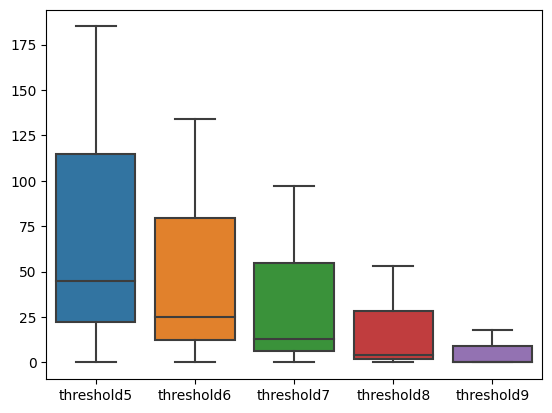

In [35]:
def users_count_threshold(threshold):
    
    """
    count/frequency of users (same/different) with the two revisions which are likely damaging
    
    Args:
        threshold (number): confidence level to determine likely damaging edits
        
    Returns:
        user_list -> ([number]): a list containing the same user, different user or users with likely damaging edits 
    
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    userlist = users_count(damaginglist)
    return userlist

userlist1 = users_count_threshold(0.5)
userlist2 = users_count_threshold(0.6)
userlist3 = users_count_threshold(0.7)
userlist4 = users_count_threshold(0.8)
userlist5 = users_count_threshold(0.9)

label = ['same user', 'different users', 'hidden']
df = pd.DataFrame(list(zip(label, userlist1, userlist2, userlist3, userlist4, userlist5)), columns =['label', 'threshold5', 'threshold6', 'threshold7', 'threshold8', 'threshold9'])
sns.boxplot(data=df)  #seaborn boxplot(box and whisker plot)

<AxesSubplot: >

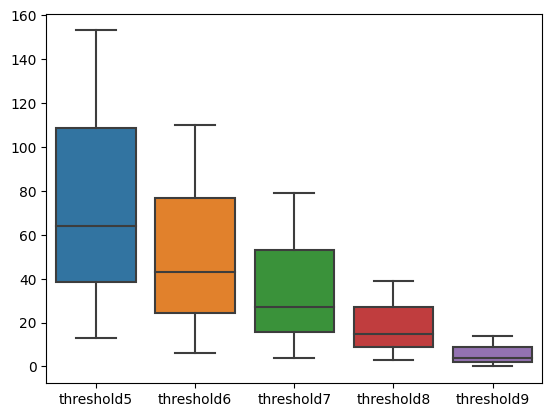

In [36]:
def size_count_threshold(threshold):
    
    """
    counts any size(html in bytes) difference between the two revisionswhich are likely damaging
    
    Args:
        threshold (number): confidence level to determine likely damaging edits
        
    Returns:
        size_count -> ([number]): a list containing the number of revisions with either changed (increased or decreased) or unchanged size that are likely damaging
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    sizelist = size_revision(damaginglist)
    return sizelist

sizelist1 = size_count_threshold(0.5)
sizelist2 = size_count_threshold(0.6)
sizelist3 = size_count_threshold(0.7)
sizelist4 = size_count_threshold(0.8)
sizelist5 = size_count_threshold(0.9)

label = ['decreased size', 'increased size', 'same size']
df = pd.DataFrame(list(zip(label, sizelist1, sizelist2, sizelist3, sizelist4, sizelist5)), columns =['label', 'threshold5', 'threshold6', 'threshold7', 'threshold8', 'threshold9']) #convert list to datframe for plotting
sns.boxplot(data=df) #seaborn boxplot(box and whisker plot)

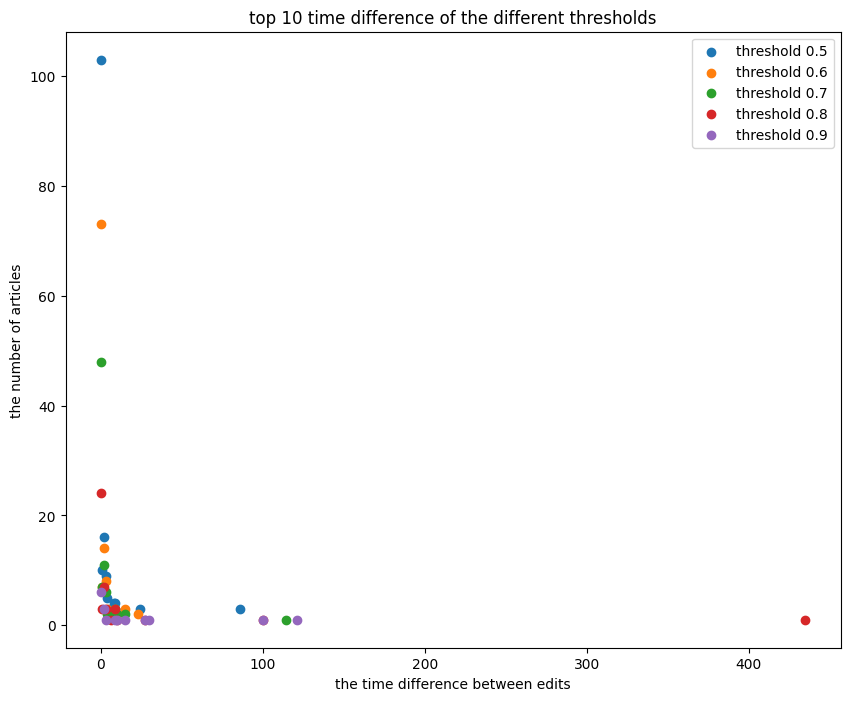

In [37]:

def time_revision_threshold(threshold):
    
    """
    the time difference between the two revisions and the frequency of articles with the same time difference that are likly damaging
    
    Args:
        threshold (number): confidence level to determine likely damaging edits
        
    Returns:
        labels ([diff_date]): the time difference between both revisions that are likely damaging
        values ([counter]): the number/frequency of articles with the same time difference are likely damaging
        
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    label, value = time_difference_revisions(damaginglist)
    return label, value

label0, value0 = time_revision_threshold(0.5)
label1, value1 = time_revision_threshold(0.6)
label2, value2 = time_revision_threshold(0.7)
label3, value3 = time_revision_threshold(0.8)
label4, value4 = time_revision_threshold(0.9)

# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(label0, value0, label=f'threshold 0.5') #matplotlib scatterplot for threshold of 0.5
plt.scatter(label1, value1, label=f'threshold 0.6') #matplotlib scatterplot for threshold of 0.6
plt.scatter(label2, value2, label=f'threshold 0.7') #matplotlib scatterplot for threshold of 0.7
plt.scatter(label3, value3, label=f'threshold 0.8') #matplotlib scatterplot for threshold of 0.8
plt.scatter(label4, value4, label=f'threshold 0.9') #matplotlib scatterplot for threshold of 0.9

# Plot
plt.title('top 10 time difference of the different thresholds')
plt.xlabel('the time difference between edits')
plt.ylabel('the number of articles')
plt.legend()
plt.show()

# Observation comparing 0.5 to 0.9 confidence level
 
 - The namespace been edited still remains on the 0 namespace which means only articles are been edited. however at 0.5, namespace of 1 was also considered likely damaging but namespace of 1 is a user talk page https://en.wikipedia.org/wiki/Wikipedia:Namespace which is not considered at this point.
 
 - For unique users(unregistered users) making edits, a good 83% of the users who made likely damaging edits are unique users while the other approx. 17% are registerd users. note: a lot of variables can play in the 17% who are registered and they are: the age of account as well as level of accounts need to be determined. this is because the level of counts i.e the position the account play in the wikipedia community maybe due to the number of edits made by the account is needed as well as when the timestamp an account was created.
 
 - Users count in the 0.9 threshold were all done by different users i.e a user creating a damaging edit and another user reverting/undoing this edit. hwerver, this is different in other threshold but relatively more different users are measured.
 
 - Size count, generally have a greater percentage of articles have an increase in byte size relative to a decrease/no change in byte size
 
 - The comments/parsed comments in the compare api play an important role in determine damaging/reverted edits. comments in the talk page could be in form of warnings and /or comments stating reasons for an edit.
 
 - The tags which were exclusively 'mw-reverted' when threshold is 0.9, but at other thresholds, there are sre other tags such as 'mw-undo' - to undo edits, 'new comer task'

In [5]:
def goodfaith_articlequality(threshold):
    
    """
    a comparison of variables necessary to determine likely damaging edits using ores api
    
    Args:
        threshold (number): confidence level to determine likely damaging edits
        
    Returns:
        damaging__list -> ([number]): damaging scores above the threshold
        goodfaith_list -> ([number]): goodfaith scores above the threshold
        prediction1_list -> ([number]): prediction of goodfaith scores above the threshold
        articlequality_list -> ([number]): article quality scores above the threshold
        prediction2_list -> ([number]): prediction of article quality scores above the threshold
    """
    
    edit_list = edit_response()
    
    damaging__list=[]
    goodfaith_list=[]
    prediction1_list=[]
    articlequality_list=[]
    prediction2_list=[]
    
    for response_item in edit_list: 
        revid = response_item['revid'] #revision ID 

        try:
            REQUEST_LABEL = 'Outreachy 25 Toolhub Microtask'
            USER_INFO = 'Phabricator user: Caseyyy0000'
            headers = {'User-Agent': f'{REQUEST_LABEL} - {USER_INFO}'}
            TOOLS_API_ENDPOINT = "https://ores.wikimedia.org/v3/scores"
            url = f'{TOOLS_API_ENDPOINT}/enwiki/{revid}/' #dbname - name of the database of wikipedia to work with eg. frwiki, enwiki, rev_id - The revision ID to score, model - The name of a model to use when scoring

            response = requests.get(url, headers=headers)
            scores = response.json()['enwiki']['scores'][str(revid)] # get all the scores based on diferent models
            prediction = str(scores['damaging']['score']['prediction']).lower() #the prediction value is changed to a lowercase string to prevent error
            damaging_scores = scores['damaging']['score']['probability'][prediction]

            prediction1 = str(scores['goodfaith']['score']['prediction']).lower() #the prediction value is changed to a lowercase string to prevent error
            goodfaith_scores = scores['goodfaith']['score']['probability'][prediction1]

            prediction2 = str(scores['articlequality']['score']['prediction']) #the prediction value is changed to a lowercase string to prevent error
            articlequality_scores = scores['articlequality']['score']['probability'][prediction2]

            if 'true' in prediction and damaging_scores > threshold: # conditional statement to determine edits that are damaging or not
                damaging__list.append(damaging_scores)
                goodfaith_list.append(goodfaith_scores)
                prediction1_list.append(prediction1)
                articlequality_list.append(articlequality_scores)
                prediction2_list.append(prediction2)

        except:
            continue

    return damaging__list, goodfaith_list, prediction1_list, articlequality_list, prediction2_list



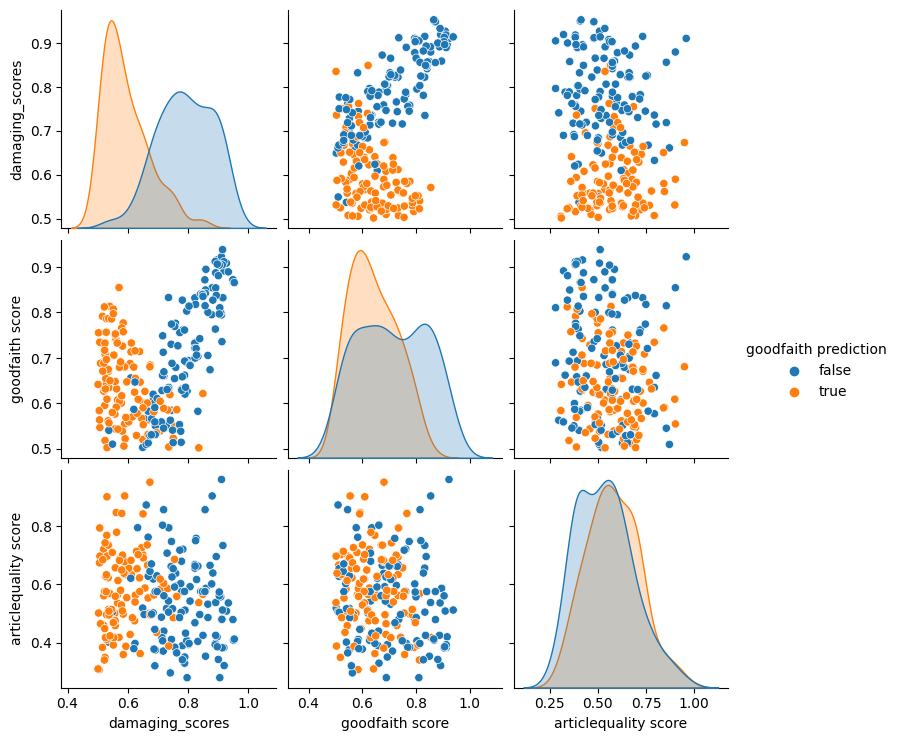

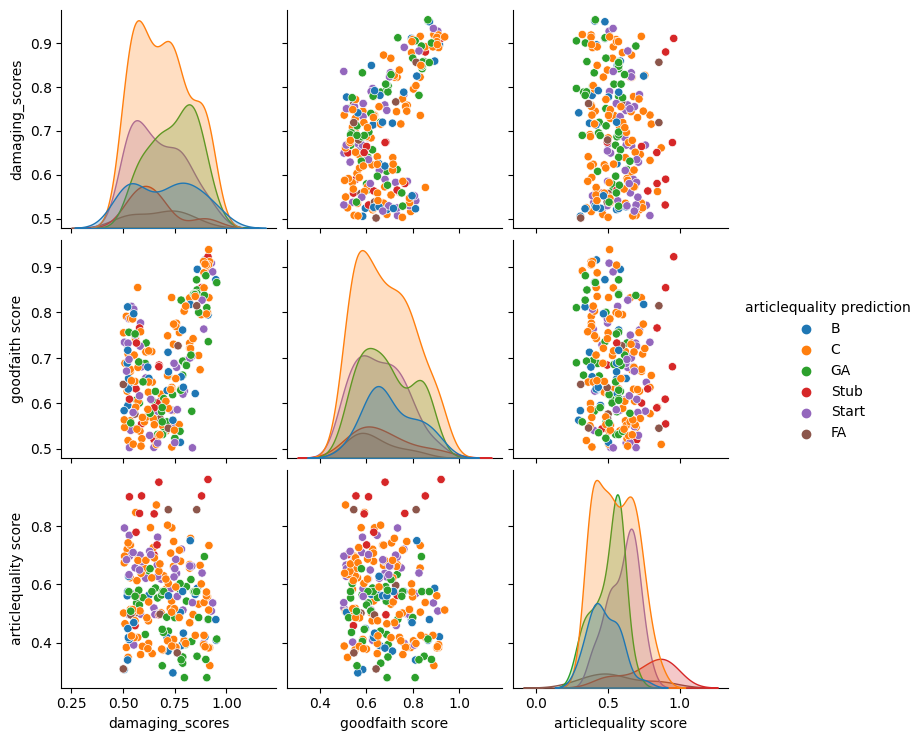

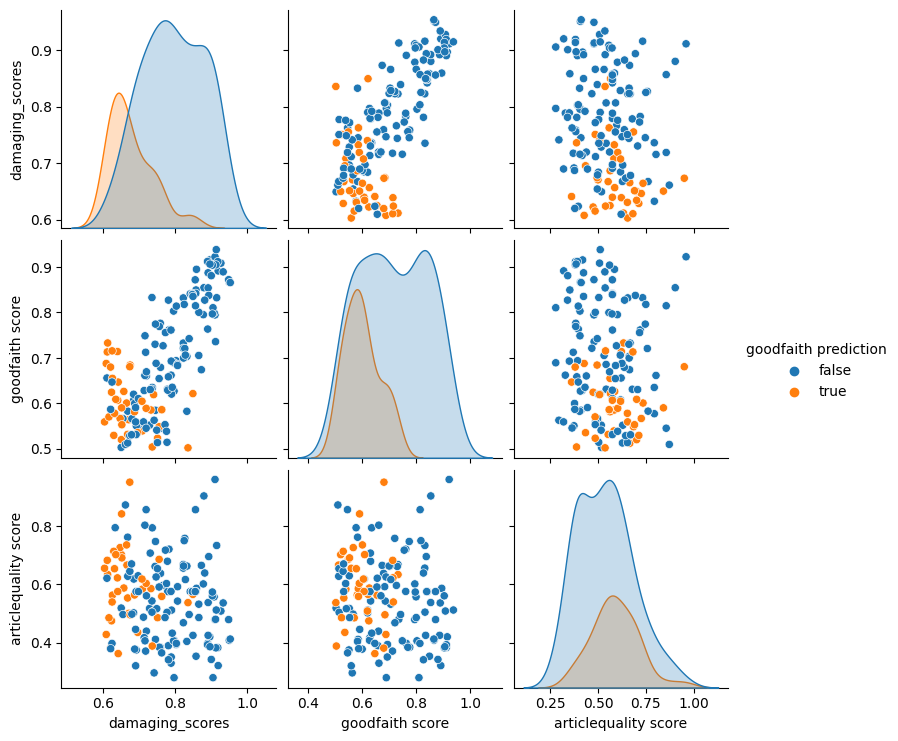

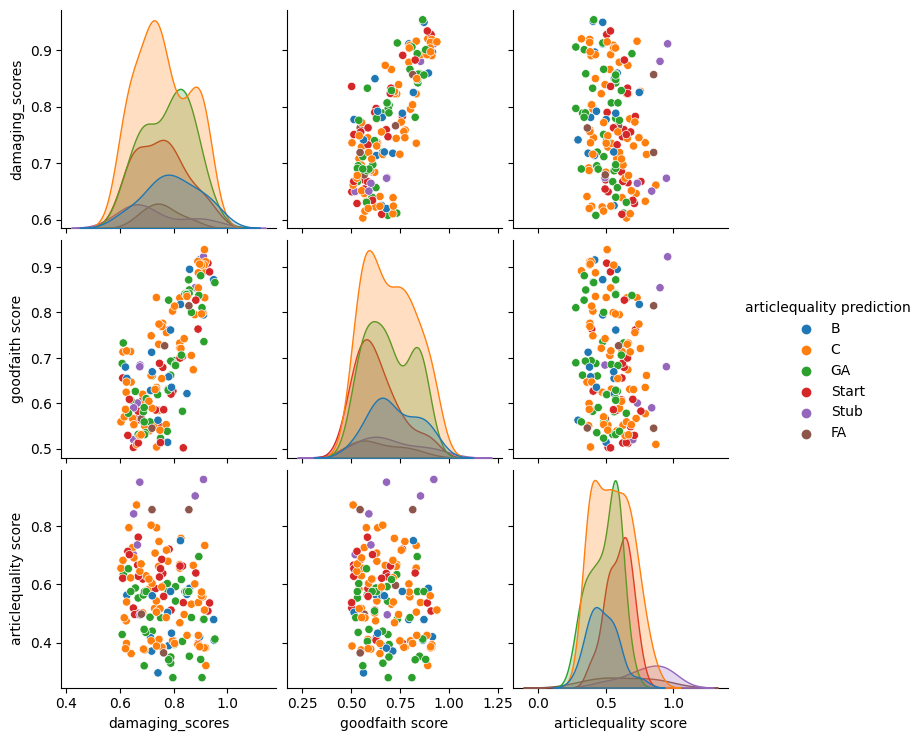

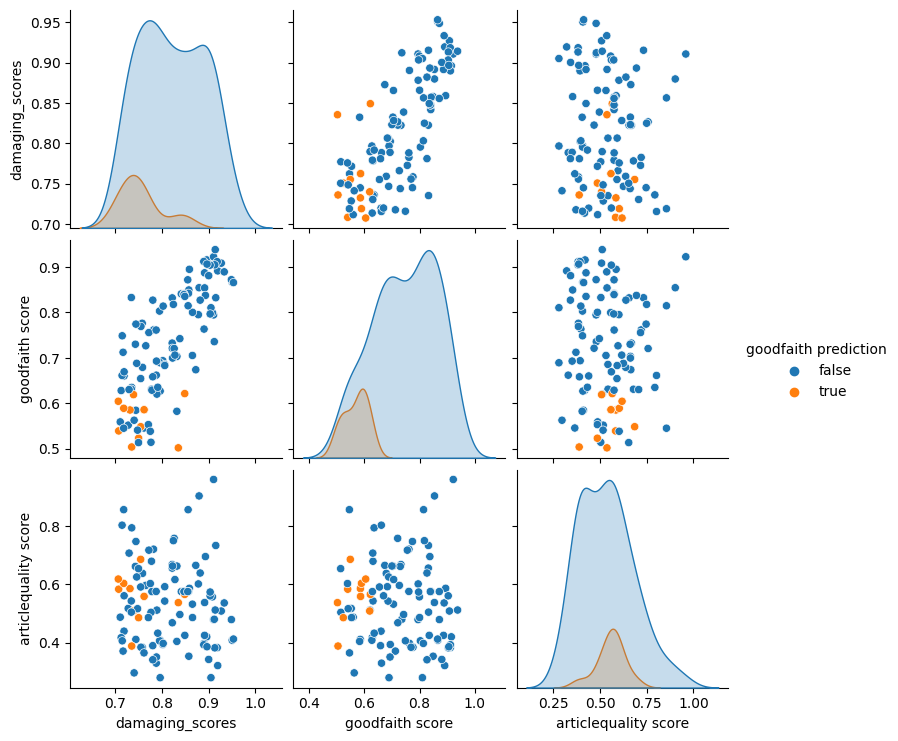

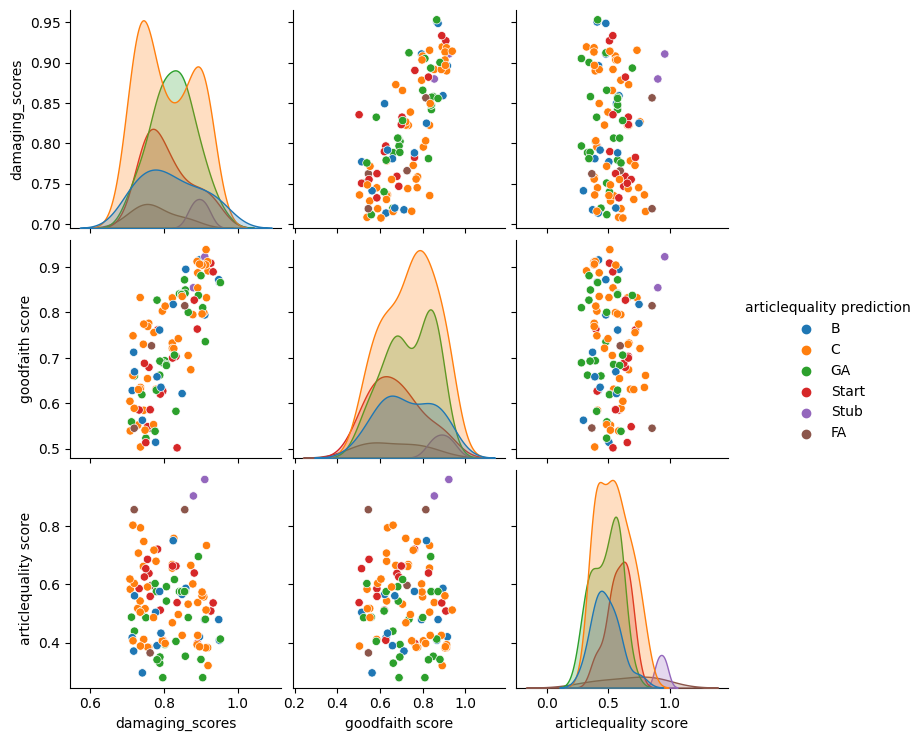

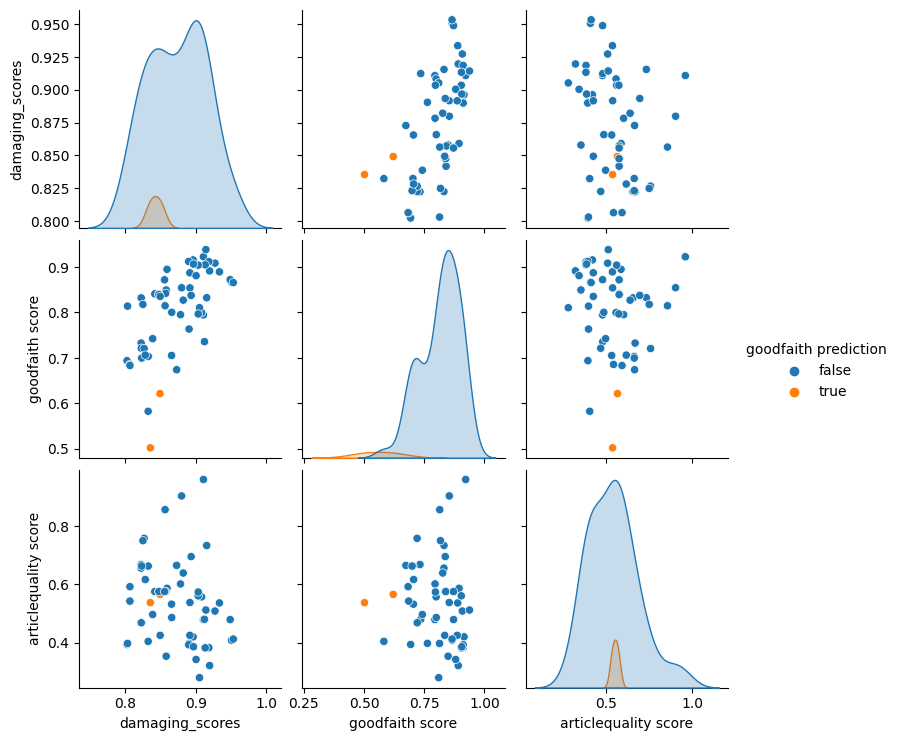

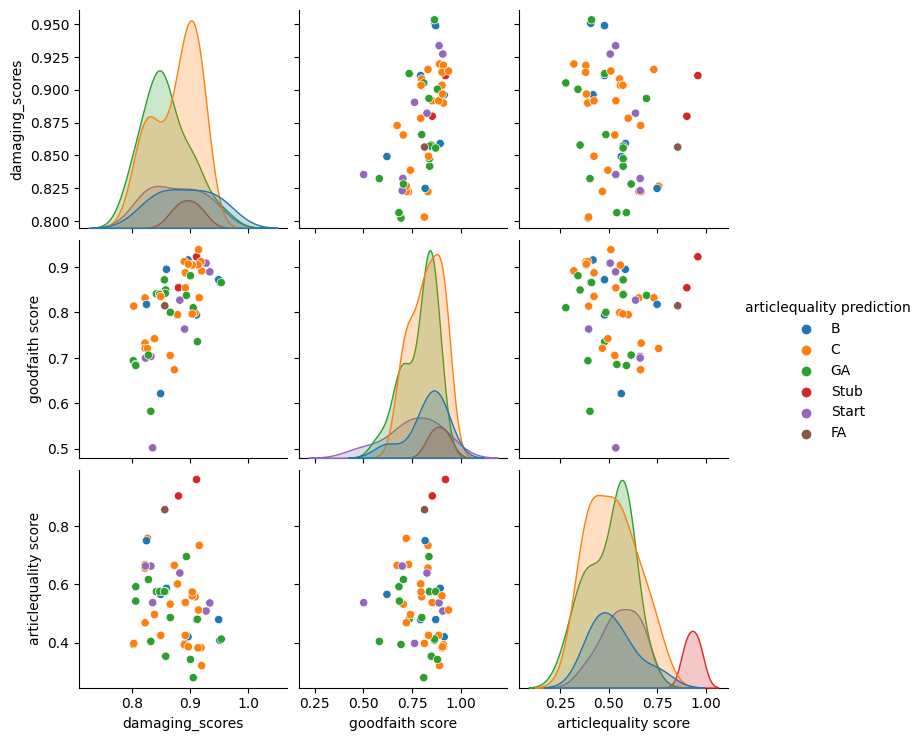

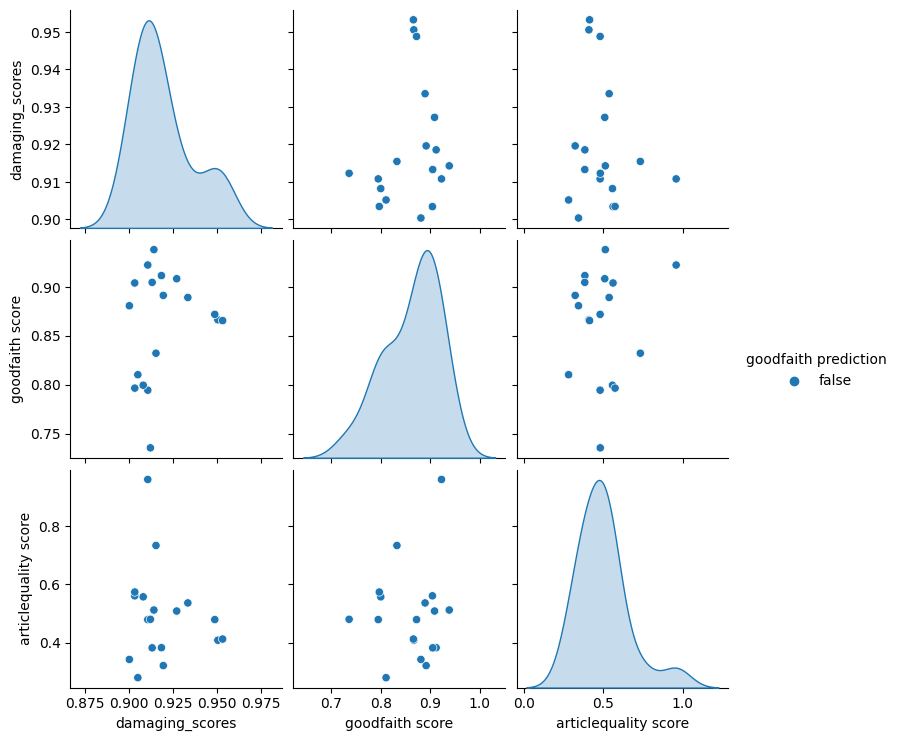

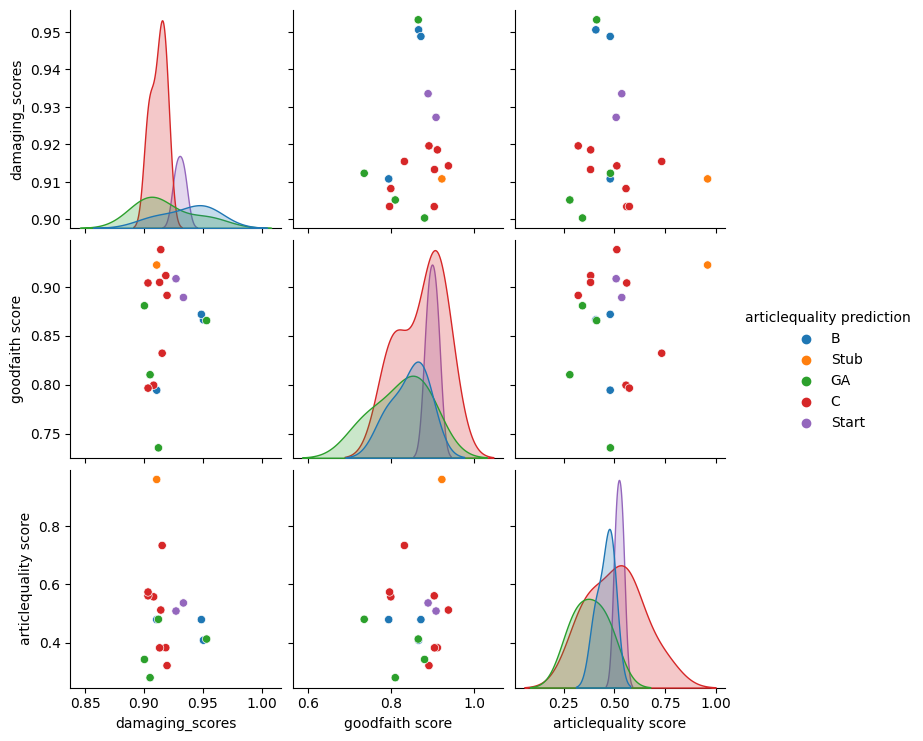

In [6]:
#visualisation above 0.5
damaging__list, goodfaith_list, prediction1_list, articlequality_list, prediction2_list = goodfaith_articlequality(0.5)
df = pd.DataFrame(list(zip(damaging__list, goodfaith_list, prediction1_list, articlequality_list, prediction2_list)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df, hue="articlequality prediction", height=2.5) #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

#visualisation above 0.6
damaging_list1, goodfaith_list1, predicton1_list1, articlequality_list1, prediction2_list1 = goodfaith_articlequality(0.6)
df1 = pd.DataFrame(list(zip(damaging_list1, goodfaith_list1, predicton1_list1, articlequality_list1, prediction2_list1)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df1, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df1, hue="articlequality prediction", height=2.5) #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

#visualisation above 0.7
damaging_list2, goodfaith_list2, predicton1_list2, articlequality_list2, prediction2_list2 = goodfaith_articlequality(0.7)
df2 = pd.DataFrame(list(zip(damaging_list2, goodfaith_list2, predicton1_list2, articlequality_list2, prediction2_list2)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df2, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df2, hue="articlequality prediction", height=2.5) #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

#visualisation above 0.8
damaging_list3, goodfaith_list3, predicton1_list3, articlequality_list3, prediction2_list3 = goodfaith_articlequality(0.8)
df3 = pd.DataFrame(list(zip(damaging_list3, goodfaith_list3, predicton1_list3, articlequality_list3, prediction2_list3)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df3, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df3, hue="articlequality prediction", height=2.5)  #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

#visualisation above 0.9
damaging_list4, goodfaith_list4, predicton1_list4, articlequality_list4, prediction2_list4 = goodfaith_articlequality(0.9)
df4 = pd.DataFrame(list(zip(damaging_list4, goodfaith_list4, predicton1_list4, articlequality_list4, prediction2_list4)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df4, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df4, hue="articlequality prediction", height=2.5) #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

# Explaining the above pairplots for different confidence levels

From the first diagram, using the 0.5 threshold, we see that the articles with high damaging scores have a false prediction in good faith. It is the assumption that editors' edits are made in good faith – that is, the assumption that people are not deliberately trying to hurt Wikipedia, even when their actions are harmful. 

From the second diagram, using the 0.5 threshold, we see from both pairplots that a good number of the articles have an article quality of a C while a few have a featured article quality, FA. note that, quality assessment as a multi-class classification task, with labels Stub ≤ Start ≤ C ≤ B ≤ GA ≤ FA.

Also, the likely damaging articles(using threshold of 0.5) have few articles of article quality Stub and a fewer article of article quality of FA.

 - At a confidence level of 0.9 and above, there are no featured articles, FA and a good number of C. Also, none of the articles were saved in good faith.

 - At a confidence level of 0.8 and above, there are a few featured articles, FA and a good number of C. Also, a few articles were saved in good faith.

 - Generally as the damaging score(confidence level) reduces, there are more articles saved in goodfaith and there is a little increase in featured articles, FA.

https://en.wikipedia.org/wiki/Wikipedia:Content_assessment

In [ ]:
# install all the necessary dependencies
!pip install mwapi
!pip install mwedittypes

In [ ]:
# import all the necessary dependencies
from datetime import datetime #for date and time strings
from collections import Counter #count frequecy/occurence of data
from matplotlib import pyplot as plt # for plotting chats and graphs
from mwedittypes import SimpleEditTypes
import mwapi
import re #regular expression
import requests  # necessary to make API calls
import asyncio #for async requests
import aiohttp 
import numpy as np
import pandas as pd
import seaborn as sns

# Recent Edits

The [RecentChanges API](https://www.mediawiki.org/wiki/API:RecentChanges) can help you fetch all the recent changes made to a wiki. Here's how you would use [python-mwapi](https://github.com/mediawiki-utilities/python-mwapi#readme), which is a client for the [MediaWiki API](https://www.mediawiki.org/wiki/API:Main_page#Introduction), to get the 3 latest changes made to english wikipedia:

In [ ]:
#pagination for 5000 edits

def edit_response() -> list:
    
    """
    a list of dictionary (type:edit) of recentchanges starting from the 16th of October at 16pm made using api: https://en.wikipedia.org synchronously 

    Returns:
        edit_list ([dictionary]): [5000 dictionaries of recentchanges made to Wikipedia which includes title, namespaces,
        ids, revid, old_revid, user, tags, timestamp]
    """
    
    session = mwapi.Session(
        host="https://en.wikipedia.org",
        user_agent="Outreachy round fall 2022"
    )

    params = {
            "action": "query", #fetches information about a wiki page/pages
            "list": "recentchanges",
            "rcprop": "title|ids|user|tags|timestamp",
            "rclimit": 500, #a round of request prints 500 recentchanges
            "rcstart": "2022-10-06T16:00:00Z", #start date of recentchanges
            "rctype": "edit", #the type of changes eg log, edit etc
            "format": "json",
    }
   
    edit_list=[]
    response = session.get(params, continuation=True)  # When continuation=True, session.get returns a generator of responses
    for response_list in response: #loops through response got from api
        
        for response_item in response_list['query']['recentchanges']:
            edit_list.append(response_item)
        if len(edit_list) == 5000: #this ensures we get exactly 5000 responses
            break
            
    return edit_list

edit_list = edit_response()
print(edit_list)

Notice that each of those changes has a "type". For our microtasks, we're only interested in the type "edit". The property "ns" means namespace and all encyclopedia articles belong to the "main namespace" or ns 0. You can read through the API documentation linked above to see how to only get changes with properties that we're interested in.

Using this API, fetch the first 5000 edits made to enwiki articles, starting October 6th, 16:00 UTC and try to find:

* The total number of articles the edits were made to.
* The number of unique users making the edits.
* Top 10 articles by number of edits
* Top 10 users by number of edits.



In [ ]:
#The total number of articles the edits were made to
def total_num_articles() -> int:
    
    """
    total number of articles the edits were made where ns(namespaces) is equal to 0

    Returns:
        len(new_list) -> (number): counts the number of edits made to articles in wikipedia
    """
    
    edit_list = edit_response() 
    new_list = [response_item for response_item in edit_list if response_item["ns"] == 0] #list comprehension with a conditional statement for edits made to articles only

    return len(new_list)
    
total_num_articles()

2927

In [ ]:
#The number of unique users making the edits

def num_unique_users(edit_list) -> int:
    
    """
    total number of uniques users that made edits in wikipedia. unique users are allocated ip addresses
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        len(uniqueusers_list) -> (number): counts the number of unique users that made edits to wikipedia 
    """
    
    uniqueusers_list=[]
    for response_item in edit_list:
        
        unique_user_ipv4 = re.search("^(([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.){3}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])$", response_item['user']) 
        unique_user_ipv6 = re.search("(?:^|(?<=\s))(([0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,7}:|([0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,5}(:[0-9a-fA-F]{1,4}){1,2}|([0-9a-fA-F]{1,4}:){1,4}(:[0-9a-fA-F]{1,4}){1,3}|([0-9a-fA-F]{1,4}:){1,3}(:[0-9a-fA-F]{1,4}){1,4}|([0-9a-fA-F]{1,4}:){1,2}(:[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:((:[0-9a-fA-F]{1,4}){1,6})|:((:[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(:[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(ffff(:0{1,4}){0,1}:){0,1}((25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])|([0-9a-fA-F]{1,4}:){1,4}:((25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9]))(?=\s|$)", response_item['user'])
        #unique_user_ipv6 = re.search('''(([0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,7}:|([0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,5}(:[0-9a-fA-F]{1,4}){1,2}|([0-9a-fA-F]{1,4}:){1,4}(:[0-9a-fA-F]{1,4}){1,3}|([0-9a-fA-F]{1,4}:){1,3}(:[0-9a-fA-F]{1,4}){1,4}|([0-9a-fA-F]{1,4}:){1,2}(:[0-9a-fA-F]{1,4}){1,5}|[0-9a
        #-fA-F]{1,4}:((:[0-9a-fA-F]{1,4}){1,6})|:((:[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(:[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(ffff(:0{1,4}){0,1}:){0,1}((25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])|([0-9a-fA-F]{1,4}:){1,4}:((25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(25[0-5]|(2[0-4]|1{0,1}[0-9]){0,1}[0-9]))''', response_item['user'])
        #unique users are users not registerd so inorder to keep track of activities they are saved with their ip numbers/addresses that is, represent their usernames and a regex that extract ipv4, ipv6, and ipv6 compressed numbers i.e 8-bit and 32-bit. other suggestions to get ip addresses is a socket python library.
        
        if unique_user_ipv4: #conditional statement for ipv4 addresses
            uniqueusers_list.append(response_item['user'])
        elif unique_user_ipv6: #conditional statement for all ipv6 addresses including compressed addresses
            uniqueusers_list.append(response_item['user'])
    return len(uniqueusers_list)

editlist = edit_response()
unique = num_unique_users(editlist)
print(unique)

In [ ]:
#Top 10 articles by number of edits

def top_articles(edit_list) -> list:
    
    """
    top 10 highest number of articles that edits were made where the namespace is 0
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        top_articlelist -> ([tuple]): counts and selects the top 10 articles with the most edits and 
        returns the name of the article and their occurences
    """
    
    article_list = Counter([response_item['title'] for response_item in edit_list if response_item["ns"] == 0]) #counts the frequency of edits made on an article by the title of articles 
    top_articlelist = article_list.most_common(10) # truncates the previous result to only top/highest 10
    
    return top_articlelist
    
editlist = edit_response()
top = top_articles(editlist)
print(top)

In [ ]:
#Top 10 users by number of edits

def top_editusers(edit_list) -> list:
    
    """
    top 10 highest number of users that edits were made 
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        top_userslist -> ([tuple]): counts and selects the top 10 user with the most edits and returns 
        the name of the user and their occurences
    """
  
    users_list = Counter([response_list['user'] for response_list in edit_list]) # counts the frequency of users making these changes of articles and truncates to only top/highest 10
    top_userslist = users_list.most_common(10) # truncates the previous result to only top/highest 10
    
    return top_userslist

editlist = edit_response()
users=top_editusers(editlist)
print(users)

The mwapi client also provides an [AsyncSession](https://github.com/mediawiki-utilities/python-mwapi#asynchronous-single-query) for making asynchronous requests. This can help speed up the process of getting data from an API in some cases. Try using the AsyncSession to query the recentchanges API. 

* Do you see a difference in the total execution time?
* What do you think causes this difference?

In [ ]:
#pagination for 5000 recentchanges using an async session

async def query():
    async with aiohttp.ClientSession() as s:
        session = mwapi.AsyncSession(
                    'https://en.wikipedia.org',
                    user_agent='mwapi async demo',
                    session=s)
        params = {
            "action": "query",
            "list": "recentchanges",
            "rcprop": "title|ids|user|tags|timestamp",
            "rctype": 'edit',
            "rclimit": 500,
            "rcstart": "2022-10-06T16:00:00Z",
            "format": "json",
        }

        response = await asyncio.create_task(
            session.get(params,
                continuation=True)
        )
        response_list = []
        async for response_item in response:
            if 'query' in response_item:
                for page in response_item['query']['recentchanges']:
                    response_list.append(page)
                if len(response_list) == 5000:
                    break
        
        print(response_list)

loop = asyncio.get_event_loop() #this runs dfferently on python but on jupyter notebook, a loop event and a create task has to be created in order to run

loop.create_task(query())

<Task pending name='Task-4' coro=<query() running at /tmp/ipykernel_1829/3198112381.py:3>>


# Answer

The AsyncSession of the mwapi client is a little bit slower than the synchronous (single) session. 

Asyncio is, fundamentally: 

1. Parallelism (multiprocessing) which performing multiple operations at the same time by spreading tasks over a CPU or core. 
2. Threading further explains its model of exceution - concurrency that is, tasks running in an overlapping manner. 

This gives rise to a Coroutines(generator-based) (a central feature of async IO) can be scheduled concurrently, but they are not inherently concurrent so your process is not idle. 

In the above, there is only one coroutine so this runs normally and awaits the response from the api call that is, it works synchronously. The wikipedia server can not output more than 500 respose per query, that is, it has some limit. Note Some APIs have limits for number of quesies per second. And if server has limits then you can't it make faster. 

However, splitting processes into 2 coroutines (await asyncio.gather(loop.create_task(function A()), loop.create_task(function B()))) and make them run in parallel helps will speed the process up but this is not applicable here. 

# Damaging Edits

On Wikipedia, reverting means undoing or otherwise negating the effects of one or more edits, which restores the page to a previous version. Edits can get reverted for being unsourced, biased or, malicious among other reasons. 

Assuming that most damaging edits will get reverted, you can use the [ORES API](https://www.mediawiki.org/wiki/ORES#API_usage) to predict how many of the edits that you've sampled are likely to be reverted using the "damaging" model. Once you have the scores for all edits, try summarizing them using statistics.


# Answers

Confidence, in statistics, is another way to describe probability. For example, if you construct a confidence interval with a 95% confidence level, you are confident that 95 out of 100 times the estimate will fall between the upper and lower values specified by the confidence interval. A confidence level of 90%(0.9) - 100%(1). 

A prediction value that returns boolean values, returns true that the edit made maybe damaging and a probability value greater than 0.9 means it is more likely damaging and this edit is likely to be reverted.

In [ ]:
# damaging scores using ores api

def damaging_scores_statistics(dbname, model_type, threshold) -> list:
    
    """
    number of articles that are likely damaging based on the prediction and probaility using all the recentchanges id using api: https://ores.wikimedia.org/v3/scores/enwiki
    
    Args:
        dbname(string): the name of the database of interest eg enwiki, frwiki etc
        model_type(string): the particular machine learning model of choice eg articlequality, damaging etc
        threshold(number): threshold/confidence level of the damaging scores
        
    Returns:
        damaging_article_list (list): article edit that is likely damaging
    """
    
    edit_list = edit_response() #calling the edit_response function to get the revid
    damaging_article_list=[]
    
    for response_item in edit_list: 
        revid = response_item['revid'] #revision ID 
        
        try:
            REQUEST_LABEL = 'Outreachy 25 Toolhub Microtask'
            USER_INFO = 'Phabricator user: Caseyyy0000'
            headers = {'User-Agent': f'{REQUEST_LABEL} - {USER_INFO}'}
            TOOLS_API_ENDPOINT = "https://ores.wikimedia.org/v3/scores"
            url = f'{TOOLS_API_ENDPOINT}/{dbname}/{revid}/{model_type}' #dbname - name of the database of wikipedia to work with eg. frwiki, enwiki, rev_id - The revision ID to score, model - The name of a model to use when scoring

            response = requests.get(url, headers=headers)
            scores = response.json()['enwiki']['scores'][str(revid)] # get all the scores based on diferent models
            prediction = str(scores[model_type]['score']['prediction']).lower() #the prediction value is changed to a lowercase string to prevent error
            damaging_scores = scores[model_type]['score']['probability'][prediction]
            
            if 'true' in prediction and damaging_scores > threshold: # conditional statement to determine edits that are damaging or not
                #damaging_article_count += 1
                damaging_article_list.append(response_item)
                
        except:
            continue
        
    return damaging_article_list
    
damaging_article_list = damaging_scores_statistics('enwiki', 'damaging', 0.9)
print('likely Damaging edits', ' -> ', len(damaging_article_list))

# Comparing edits

For the revisions that you sampled from Recent Changes, compare each to its parent revision (`old_revid` from RecentChanges response) and try to find some similarities and differences between them. For example, you can try finding:

* If they were made by the same or different users
* How far apart the two edits were made

In addition to comparing the metadata, it can also be helpful to compare the content of the revisions too. One way of doing that would be using the [mwedittypes](https://github.com/geohci/edit-types#mwedittypes) package that helps summarize the changes made by an edit to the content of an article. Here's an example of how to compare the wikitext of two revisions 

In [ ]:
#If they were made by the same or different users

def users_count(edit_list):
    
    """
    list of the count/frequency of users (same/different) with the two revisions, also if the revisions were deleted 
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 
        
    Returns:
        userlist -> ([user_count, users_count, hidden_count]): a list containing the same user, different user or users with deleted revisions
    """
    
    user_count = 0
    users__count = 0
    hidden_user = 0
    userlist=[]

    for response_item in edit_list:

        try:

            new_id = response_item['revid']
            old_id = response_item['old_revid']
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare", #compares edits using old and new revision ids(difference between two pages)
                    "fromrev": old_id,
                    "torev": new_id,  
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change

            }

            response = session.get(
                                params
            )

            from_user = response['compare']['fromuser']
            to_user = response['compare']['touser']

            if from_user in to_user: #conditional statement to check if the user that made previous and recent edits are the same
                user_count += 1 #same user

            elif  from_user in 'fromuserhidden': #conditional statement to check If the user has been revision deleted
                hidden_user += 1

            elif to_user in 'touserhidden': #conditional statement to check If the user has been revision deleted
                hidden_user += 1

            else:  #conditional statement to check if the user that made previous and recent edits are the different
                users__count += 1 # different users

        except: 
            continue

            
    userlist.append(user_count)
    userlist.append(users__count)
    userlist.append(hidden_user)
    return userlist  

editlist = edit_response()
user_count, users__count, hidden_user = users_count(editlist)  
print('same user', user_count, '\n', 'different users', users__count, '\n', 'hidden user', hidden_user)


In [ ]:
#time difference between both revisions 

def time_difference_revisions(edit_list) -> list:
    
    """
    the time difference between the two revisions and the frequency of articles with the same time difference
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 
        
    Returns:
        labels ([diff_date]): the time difference between both revisions
        values ([counter]): the number/frequency of articles with the same time difference
        
    """
    
    date_list=[]

    for response_item in edit_list:

        try:

            new_id = response_item['revid'] #new revision ID
            old_id = response_item['old_revid'] #new old revision ID
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare",
                    "fromrev": old_id,
                    "torev": new_id,  # no of changes we want
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change
            }

            response = session.get(
                        params
            )

            from_timestamp = response['compare']['fromtimestamp']
            to_timestamp = response['compare']['totimestamp']

            past_date = datetime.strptime(from_timestamp, "%Y-%m-%dT%H:%M:%S%fZ") #formats string representation of date and time for ease of arithmetic operation
            present_date = datetime.strptime(to_timestamp, "%Y-%m-%dT%H:%M:%S%fZ")
            diff_date = (present_date - past_date).days # gets only the number of days in this time difference 

            date_list.append(diff_date)

        except: 
            continue

    labels = []
    values = []
    highest_dates = Counter(date_list).most_common(10) 

    for label, value in highest_dates: #the number of articles with the same date difference and the date difference
        labels.append(label) 
        values.append(value)

    return labels, values
    '''fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(labels, values, color ='maroon', width = 0.2)

    plt.xlabel("Days between each edit")
    plt.ylabel("No. of articles")
    plt.title("Distribution of the top ten time difference(in days) between edits")
    plt.show()
    
    
    explode = (0.0, 0.1, 0.0, 0.1, 0.2, 0.2, 0.1, 0.3, 0.1, 0.2) # Creating explode data
    colors = ( "orange", "cyan", "brown","pink", "indigo", "red", "olive","magenta", "indigo", "blue") # Creating color parameters
    wp = { 'linewidth' : 1, 'edgecolor' : "green" } # Wedge properties

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} articles)".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(values, autopct = lambda pct: func(pct, values), explode = explode, labels = labels, shadow = True,
    colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
    ax.legend(wedges, labels, title ="Days between each edit", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))  # Adding legend
    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title("Distribution of the top ten time difference(in days) between edits")

    plt.show() # show plot'''
    
    
editlist = edit_response()
label, value = time_difference_revisions(editlist)
print(label, value) 

In [ ]:

def size_revision(edit_list):
    
    """
    a list of counting any size(html in bytes) difference between the two revisions
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        size_list -> ([size_count, sizes_count, samesizes_count]): a list containing the number of revisions with either changed (increased or decreased) or unchanged size
    """
    
    size_count = 0
    sizes_count = 0
    samesize_count = 0
    size_list=[]
    
    for response_item in edit_list:

        try:
            new_id = response_item['revid']
            old_id = response_item['old_revid']
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare",
                    "fromrev": old_id,
                    "torev": new_id,  
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change
            }

            response = session.get(
                            params
            )

            from_size = response['compare']['fromsize']
            to_size = response['compare']['tosize']

            if from_size > to_size: #conditional statement to check if the size decreased from the previous and recent edits
                size_count += 1

            elif from_size < to_size: #conditional statement to check if the size increased from the previous and recent edits
                sizes_count += 1

            else: #conditional statement to check if the size remained the same from the previous and recent edits
                samesize_count += 1

        except: 
            continue

    size_list.append(size_count)
    size_list.append(sizes_count)
    size_list.append(samesize_count)
    return size_list
    
editlist = edit_response()    
sizelist = size_revision(editlist)
print(sizelist)
    

In [ ]:
# title change between both revisions
def title_diff_revision() -> int:
    
    """
    counts any title difference between the two revisions
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        title_count -> (number), titles_count -> (number): the number of revisions with either changed or unchanged titles
        
    """

    edit_list = edit_response()
    title_count = 0
    titles_count = 0
    
    for response_item in edit_list:
        
        try:
            new_id = response_item['revid']
            old_id = response_item['old_revid']
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare",
                    "fromrev": old_id,
                    "torev": new_id,  
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change
            }

            response = session.get(
                            params
            )

            from_title = response['compare']['fromtitle']
            to_title = response['compare']['totitle']
                
            if from_title in to_title: # check if the older and present titles are the same
                title_count += 1
                    
            else: 
                titles_count += 1
                
        except: 
            continue
                
    return title_count, titles_count
    
title_count, titles_count = title_diff_revision()
print('same title', title_count, '\n', 'different title', titles_count)

In [ ]:
def namespace_diff_revision() -> int:
    
    """
    counts namespaces between the two revisions
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        namespace -> (number), namespaces -> (number): the number of revisions with either changed or unchanged namespace 
        e.g, from article(ns = 0) to category(ns = 14)
        
    """

    edit_list = edit_response()
    namespace = 0
    namespaces = 0
    
    for response_item in edit_list:
        
        try:
            new_id = response_item['revid']
            old_id = response_item['old_revid']
            article_title = response_item['title']

            session = mwapi.Session(
                    host="https://en.wikipedia.org",
                    user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "compare",
                    "fromrev": old_id,
                    "torev": new_id,  # no of changes we want
                    "prop": "diff|diffsize|ids|title|user|size|timestamp",  # information that we want for every change
            }

            response = session.get(
                    params
            )

            from_ns = response['compare']['fromns']
            to_ns = response['compare']['tons']
                
            if from_ns == to_ns: #conditional statement to check if there was a namespace change from the previous and recent edits
                namespace += 1
                    
            else: 
                namespaces += 1
                    
        except: 
            continue
                
    return namespace, namespaces
    
namespace, namespaces = namespace_diff_revision()
print('same namespace', namespace, '\n', 'different namespace', namespaces)

In [ ]:
def content_revision_difference(edit_list):
    
    """
    gives the content difference of the revisions made of the likely damaging edits made to wikipedia
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 
    
    Returns:
        difference_detail (string): the content difference of the likely damaging edits made to wikipedia
        
    """

    for response_item in edit_list:
        try:
            revid = response_item['revid']
            article_title = response_item['title']
            
            
            session = mwapi.Session(
                        host="https://en.wikipedia.org",
                        user_agent="Outreachy round fall 2022"
            )

            params = {
                    "action": "query",
                    "prop": "revisions",
                    "titles": article_title,
                    "rvslots": "*",
                    "rvprop": "content",
                    "rvstartid": revid,
                    "rvdir": "older",
                    "rvlimit": 2,
                    "format": "json",
                    "formatversion": "2",
            }
            '''alternatively, for the params, specifying rvendid(while excluding the rvdir) 
            from the edit_response that = is, response_item['old_revid']  still gives the same response.'''

            response = session.get(
                    params
            )
            
            prev_wikitext = response['query']['pages'][0]['revisions'][0]['slots']['main']['content']
            curr_wikitext = response['query']['pages'][0]['revisions'][1]['slots']['main']['content']
            
            et = SimpleEditTypes(prev_wikitext, curr_wikitext, lang='en')
            difference_detail = et.get_diff()
            
            print(article_title, ' -> ', difference_detail)
            
        except:
            continue

            
editlist = edit_response()
content_revision_difference(editlist)

# Further Analysis on the other features of the edit

From the above functions, we can conclude that none of the edits resulted in change of namespace and title. This means that all the anmespace and title remained after the edit. Also, about 70% of the edits/revisions were made less than 24 hours. Over 50% of the edits had an increase in bytes sizes, taht is either increase in whitespace, words, extrnal/wiki links etc. and majority of these revisions were by different users and since the userids are unique to users, they are therefore unchanged(since they are unique). In the same way, the page IDs are unique just as the page title and therefore unchanged.

Feel free to compare other features of the edits than just the ones above. Also, use any visualizations here that you think would be helpful!

# Analysis

Now that you've found ways to quantify differences between revisions, what observations can you make about edits that are likely to be reverted. Are there certain types of differences associated with edits that are "damaging" according to ORES? 

# Answers

1. While most of the damaging edits are tagged 'mw-reverted' or references removed, others are considered damaging due to no references attached to these edits (unconstructive edits) and they are done by new users or unique users that is, users with ipv4 and ipv6 addresses.

NOTE: Tag:mw-reverted are Edits that were later reverted by a different edit https://en.wikipedia.org/wiki/Special:Tags

2. From the revision difference:
They have most of the following parts of the article changed/removed without reference
- Section: change
- Whitespace: remove
- Punctuation: remove
- Word: remove
- Sentence: remove
- Paragraph: change

3. In cases of whitespace and word insert, this could be due to blanking and hence having large numbers. in the same way, the byte size can increase or decrease. If vandalism occurred that resulted in blanking, a revision would increase the byte size relative to the older version. Also, if the damaging edit was an addition of a wrong information/word/slur, then this will be deleted and cause a decrease in the byte size relative to the previous version.

4. Users whose edit are reverted are uniques users . Also, new accounts who have not made non-damaging edits or any edits to wikipedia articles.

# Comparing different thresholds and checking if the same observations hold across the thresholds

In [ ]:
def top_namespace(edit_list) -> list:
    
    """
    top 10 highest number of users that edits were made 
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        top_userslist -> ([tuple]): counts and selects the top 10 user with the most edits and returns 
        the name of the user and their occurences
    """
  
    users_list = Counter([response_list['ns'] for response_list in edit_list]) # counts the frequency of users making these changes of articles and truncates to only top/highest 10
    top_userslist = users_list.most_common(10) # truncates the previous result to only top/highest 10
    
    return top_userslist

#editlist = edit_response()
#top_namespace(editlist)

In [ ]:
def top_title(edit_list) -> list:
    
    """
    top 10 highest number of articles (by title) that edits were made 
    
    Args:
        edit_list (string): list of all the edits mage from the 6th of october 2022 

    Returns:
        top_articlelist -> ([tuple]): counts and selects the top 10 articles with the most edits and 
        returns the name of the article and their occurences
    """
    
    article_list = Counter([response_item['title'] for response_item in edit_list]) #counts the frequency of edits made on an article by the title of articles 
    top_articlelist = article_list.most_common(10) # truncates the previous result to only top/highest 10
    
    return top_articlelist
    
#editlist = edit_response()
#top_title(editlist)

In [ ]:
def namespace_threshold(threshold):
    
    """
    count of likely damaging edits namepace 
    
    Args:
        threshold (number): confidence level to determine likely damaging edits

    Returns:
        namepacelist -> ([tuple]): counts likely damaging edits namepace 
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    namespacelist = top_namespace(damaginglist)
    return namespacelist

namespacelist1 = namespace_threshold(0.5)
namespacelist2 = namespace_threshold(0.6)
namespacelist3 = namespace_threshold(0.7)
namespacelist4 = namespace_threshold(0.8)
namespacelist5 = namespace_threshold(0.9)
print(namespacelist1, namespacelist2, namespacelist3, namespacelist4, namespacelist5)

[(0, 228), (1, 2)] [(0, 159)] [(0, 110)] [(0, 57)] [(0, 18)]


In [ ]:
def uniqueusers_threshold(threshold):
    
    """
    comparing total number of users versus number of unregistered/unique users making edits that are likely damaging 
    
    Args:
        threshold (number): confidence level to determine likely damaging edits

    Returns:
        len(damaginglist) -> (number): the total number of users making edits that are likely damaging 
        uniqueuserslist -> ([tuple]): counts users whose username is ip address
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    uniqueuserslist = num_unique_users(damaginglist)
    return len(damaginglist), uniqueuserslist

num1, uniqueuserslist1 = uniqueusers_threshold(0.5)
num2, uniqueuserslist2 = uniqueusers_threshold(0.6)
num3, uniqueuserslist3 = uniqueusers_threshold(0.7)
num4, uniqueuserslist4 = uniqueusers_threshold(0.8)
num5, uniqueuserslist5 = uniqueusers_threshold(0.9)
print(num1, uniqueuserslist1, num2, uniqueuserslist2, num3, uniqueuserslist3, num4, uniqueuserslist4, num5, uniqueuserslist5)

230 186 159 132 110 93 57 50 18 17


<AxesSubplot: >

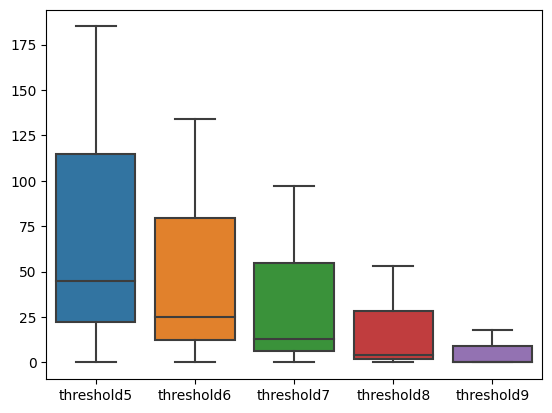

In [ ]:
def users_count_threshold(threshold):
    
    """
    count/frequency of users (same/different) with the two revisions which are likely damaging
    
    Args:
        threshold (number): confidence level to determine likely damaging edits
        
    Returns:
        user_list -> ([number]): a list containing the same user, different user or users with likely damaging edits 
    
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    userlist = users_count(damaginglist)
    return userlist

userlist1 = users_count_threshold(0.5)
userlist2 = users_count_threshold(0.6)
userlist3 = users_count_threshold(0.7)
userlist4 = users_count_threshold(0.8)
userlist5 = users_count_threshold(0.9)

label = ['same user', 'different users', 'hidden']
df = pd.DataFrame(list(zip(label, userlist1, userlist2, userlist3, userlist4, userlist5)), columns =['label', 'threshold5', 'threshold6', 'threshold7', 'threshold8', 'threshold9'])
sns.boxplot(data=df)  #seaborn boxplot(box and whisker plot)

<AxesSubplot: >

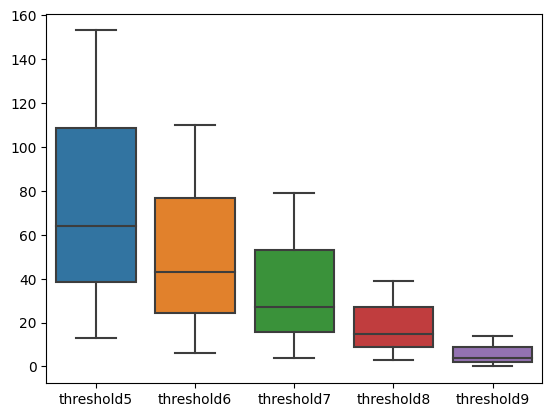

In [ ]:
def size_count_threshold(threshold):
    
    """
    counts any size(html in bytes) difference between the two revisionswhich are likely damaging
    
    Args:
        threshold (number): confidence level to determine likely damaging edits
        
    Returns:
        size_count -> ([number]): a list containing the number of revisions with either changed (increased or decreased) or unchanged size that are likely damaging
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    sizelist = size_revision(damaginglist)
    return sizelist

sizelist1 = size_count_threshold(0.5)
sizelist2 = size_count_threshold(0.6)
sizelist3 = size_count_threshold(0.7)
sizelist4 = size_count_threshold(0.8)
sizelist5 = size_count_threshold(0.9)

label = ['decreased size', 'increased size', 'same size']
df = pd.DataFrame(list(zip(label, sizelist1, sizelist2, sizelist3, sizelist4, sizelist5)), columns =['label', 'threshold5', 'threshold6', 'threshold7', 'threshold8', 'threshold9']) #convert list to datframe for plotting
sns.boxplot(data=df) #seaborn boxplot(box and whisker plot)

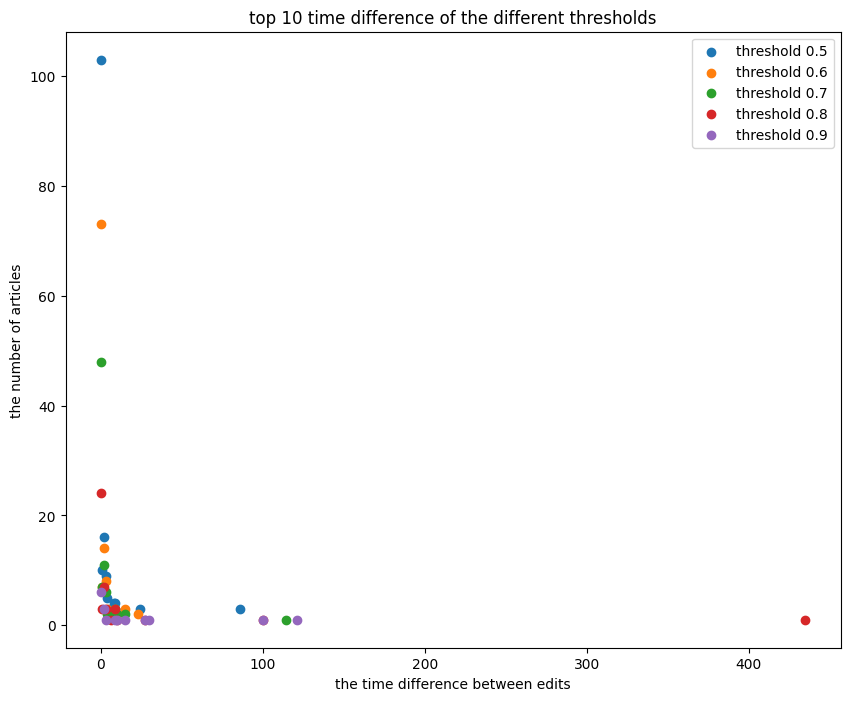

In [ ]:

def time_revision_threshold(threshold):
    
    """
    the time difference between the two revisions and the frequency of articles with the same time difference that are likly damaging
    
    Args:
        threshold (number): confidence level to determine likely damaging edits
        
    Returns:
        labels ([diff_date]): the time difference between both revisions that are likely damaging
        values ([counter]): the number/frequency of articles with the same time difference are likely damaging
        
    """
    
    damaginglist = damaging_scores_statistics('enwiki', 'damaging', threshold)
    label, value = time_difference_revisions(damaginglist)
    return label, value

label0, value0 = time_revision_threshold(0.5)
label1, value1 = time_revision_threshold(0.6)
label2, value2 = time_revision_threshold(0.7)
label3, value3 = time_revision_threshold(0.8)
label4, value4 = time_revision_threshold(0.9)

# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(label0, value0, label=f'threshold 0.5') #matplotlib scatterplot for threshold of 0.5
plt.scatter(label1, value1, label=f'threshold 0.6') #matplotlib scatterplot for threshold of 0.6
plt.scatter(label2, value2, label=f'threshold 0.7') #matplotlib scatterplot for threshold of 0.7
plt.scatter(label3, value3, label=f'threshold 0.8') #matplotlib scatterplot for threshold of 0.8
plt.scatter(label4, value4, label=f'threshold 0.9') #matplotlib scatterplot for threshold of 0.9

# Plot
plt.title('top 10 time difference of the different thresholds')
plt.xlabel('the time difference between edits')
plt.ylabel('the number of articles')
plt.legend()
plt.show()

# Observation comparing 0.5 to 0.9 confidence level
 
 - The namespace been edited still remains on the 0 namespace which means only articles are been edited. however at 0.5, namespace of 1 was also considered likely damaging but namespace of 1 is a user talk page https://en.wikipedia.org/wiki/Wikipedia:Namespace which is not considered at this point.
 
 - For unique users(unregistered users) making edits, a good 83% of the users who made likely damaging edits are unique users while the other approx. 17% are registerd users. note: a lot of variables can play in the 17% who are registered and they are: the age of account as well as level of accounts need to be determined. this is because the level of counts i.e the position the account play in the wikipedia community maybe due to the number of edits made by the account is needed as well as when the timestamp an account was created.
 
 - Users count in the 0.9 threshold were all done by different users i.e a user creating a damaging edit and another user reverting/undoing this edit. hwerver, this is different in other threshold but relatively more different users are measured.
 
 - Size count, generally have a greater percentage of articles have an increase in byte size relative to a decrease/no change in byte size
 
 - The comments/parsed comments in the compare api play an important role in determine damaging/reverted edits. comments in the talk page could be in form of warnings and /or comments stating reasons for an edit.
 
 - The tags which were exclusively 'mw-reverted' when threshold is 0.9, but at other thresholds, there are sre other tags such as 'mw-undo' - to undo edits, 'new comer task'

In [ ]:
def goodfaith_articlequality(threshold):
    
    """
    a comparison of variables necessary to determine likely damaging edits using ores api
    
    Args:
        threshold (number): confidence level to determine likely damaging edits
        
    Returns:
        damaging__list -> ([number]): damaging scores above the threshold
        goodfaith_list -> ([number]): goodfaith scores above the threshold
        prediction1_list -> ([number]): prediction of goodfaith scores above the threshold
        articlequality_list -> ([number]): article quality scores above the threshold
        prediction2_list -> ([number]): prediction of article quality scores above the threshold
    """
    
    edit_list = edit_response()
    
    damaging__list=[]
    goodfaith_list=[]
    prediction1_list=[]
    articlequality_list=[]
    prediction2_list=[]
    
    for response_item in edit_list: 
        revid = response_item['revid'] #revision ID 

        try:
            REQUEST_LABEL = 'Outreachy 25 Toolhub Microtask'
            USER_INFO = 'Phabricator user: Caseyyy0000'
            headers = {'User-Agent': f'{REQUEST_LABEL} - {USER_INFO}'}
            TOOLS_API_ENDPOINT = "https://ores.wikimedia.org/v3/scores"
            url = f'{TOOLS_API_ENDPOINT}/enwiki/{revid}/' #dbname - name of the database of wikipedia to work with eg. frwiki, enwiki, rev_id - The revision ID to score, model - The name of a model to use when scoring

            response = requests.get(url, headers=headers)
            scores = response.json()['enwiki']['scores'][str(revid)] # get all the scores based on diferent models
            prediction = str(scores['damaging']['score']['prediction']).lower() #the prediction value is changed to a lowercase string to prevent error
            damaging_scores = scores['damaging']['score']['probability'][prediction]

            prediction1 = str(scores['goodfaith']['score']['prediction']).lower() #the prediction value is changed to a lowercase string to prevent error
            goodfaith_scores = scores['goodfaith']['score']['probability'][prediction1]

            prediction2 = str(scores['articlequality']['score']['prediction']) #the prediction value is changed to a lowercase string to prevent error
            articlequality_scores = scores['articlequality']['score']['probability'][prediction2]

            if 'true' in prediction and damaging_scores > threshold: # conditional statement to determine edits that are damaging or not
                damaging__list.append(damaging_scores)
                goodfaith_list.append(goodfaith_scores)
                prediction1_list.append(prediction1)
                articlequality_list.append(articlequality_scores)
                prediction2_list.append(prediction2)

        except:
            continue

    return damaging__list, goodfaith_list, prediction1_list, articlequality_list, prediction2_list



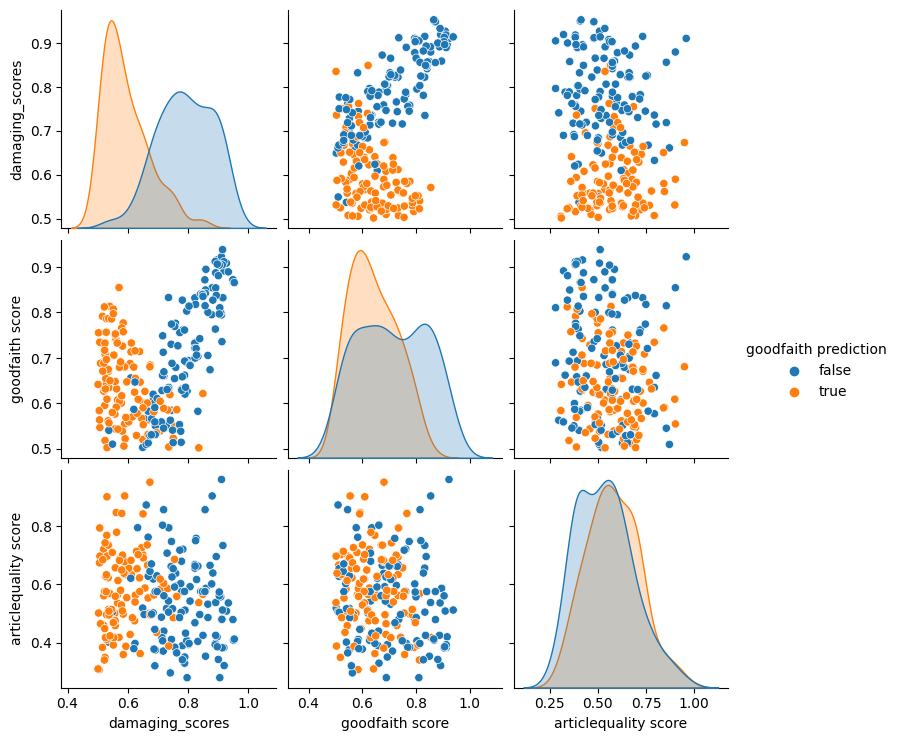

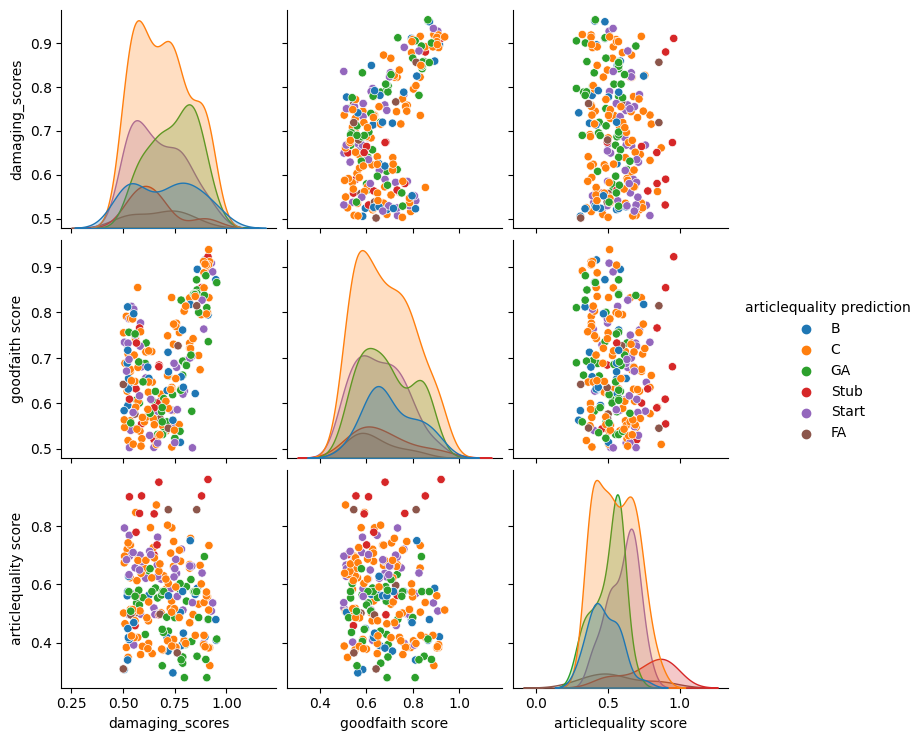

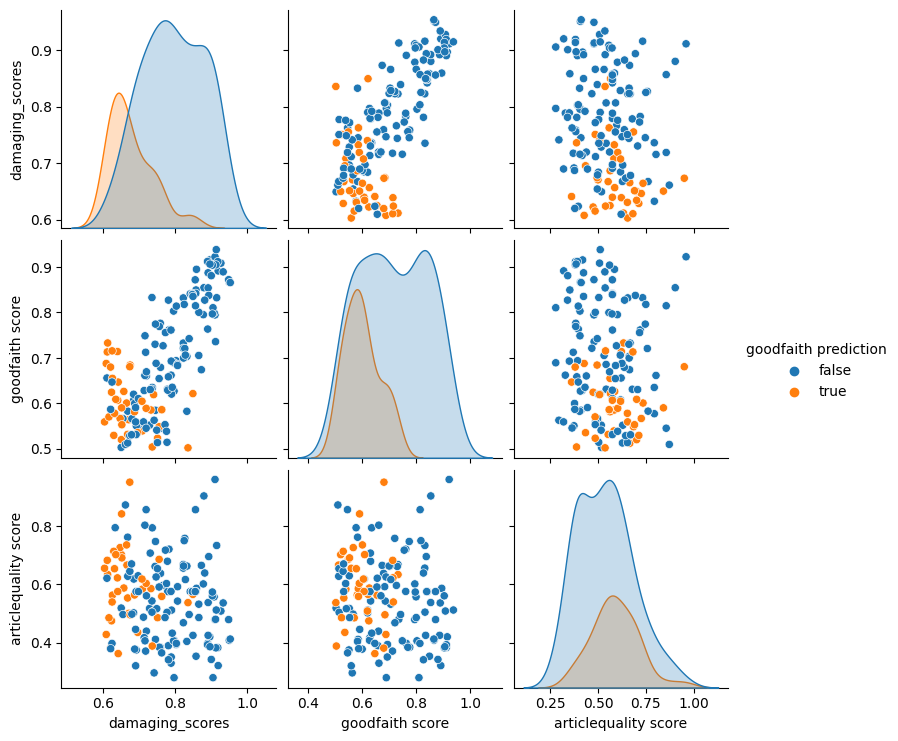

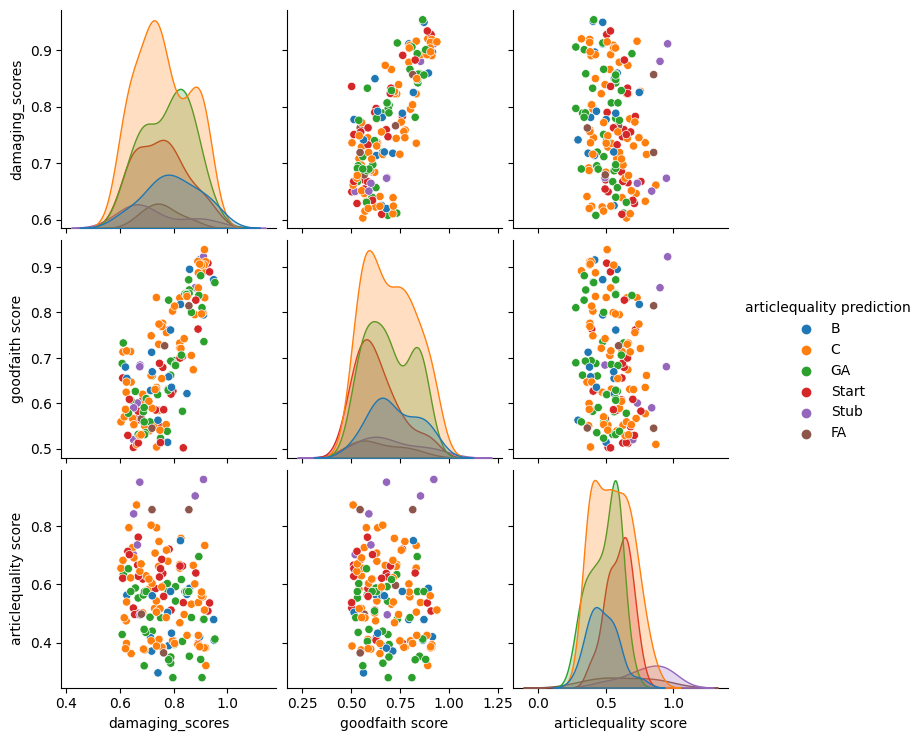

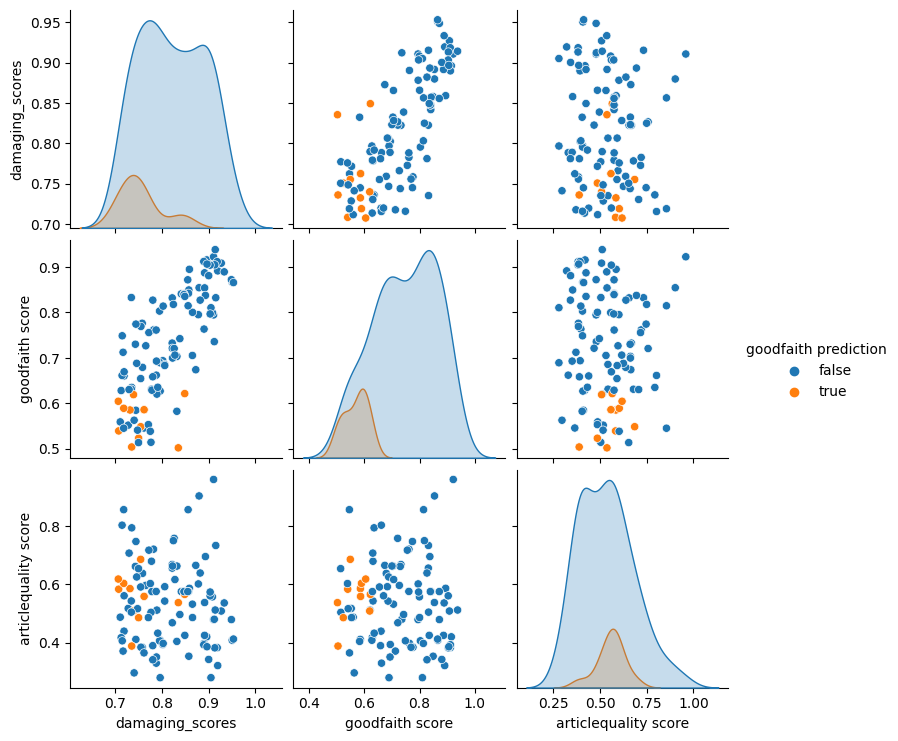

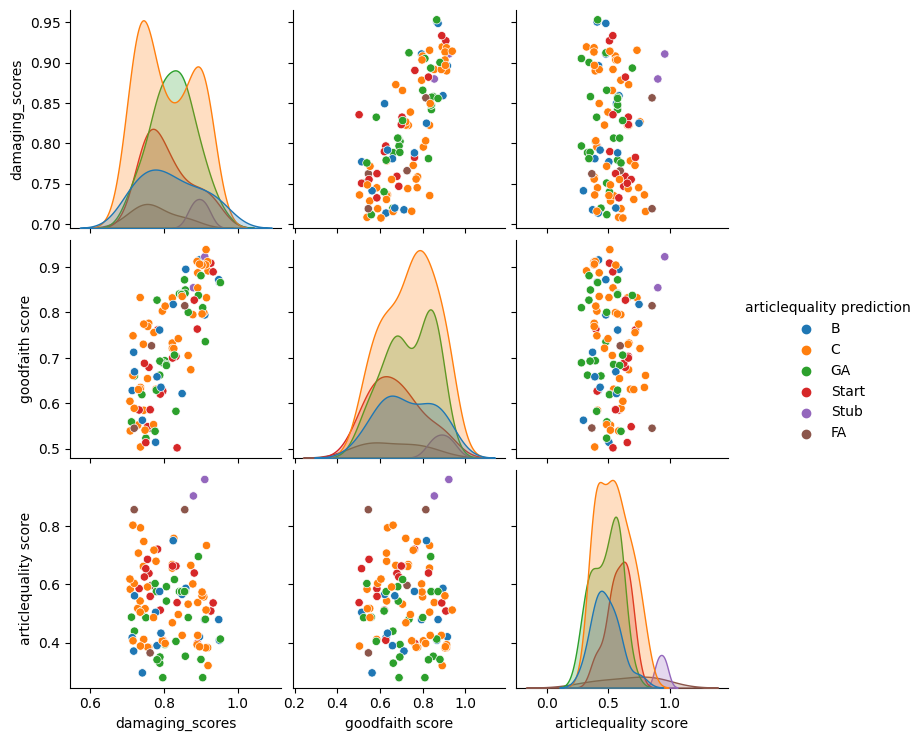

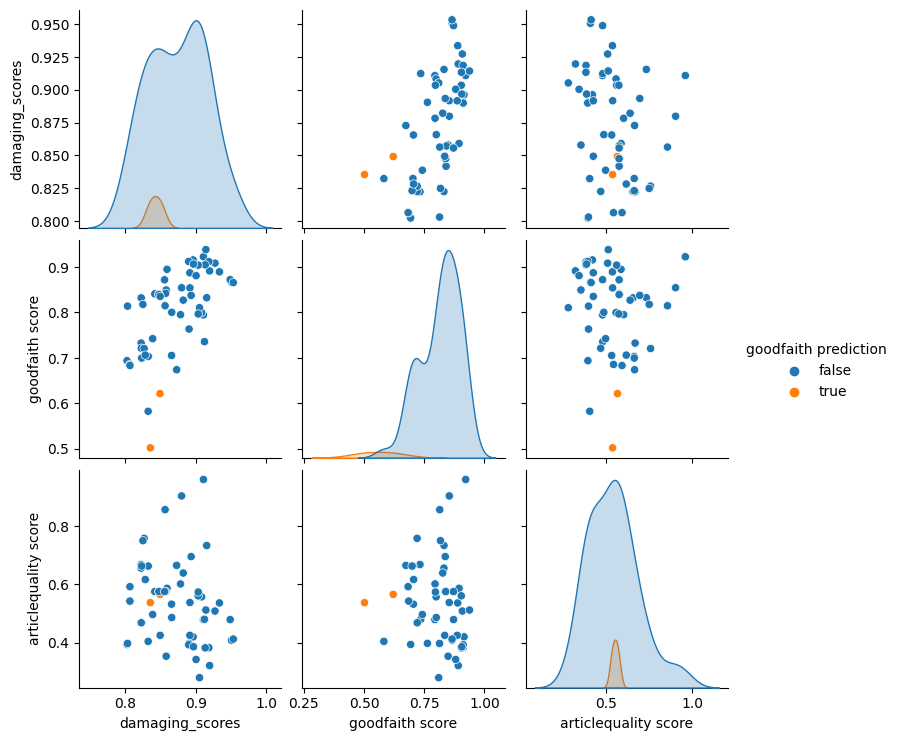

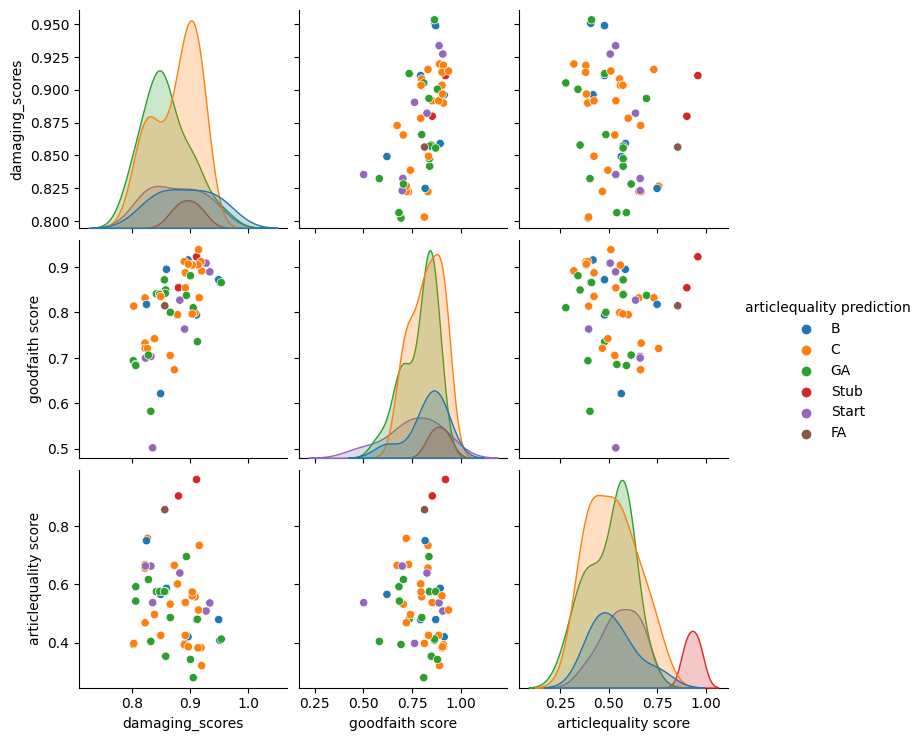

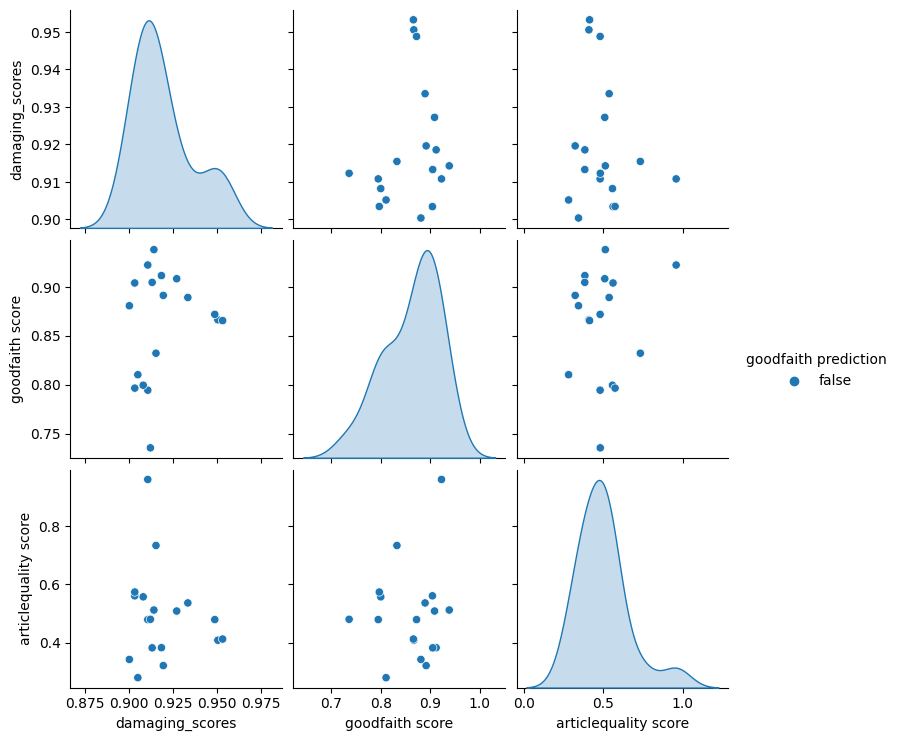

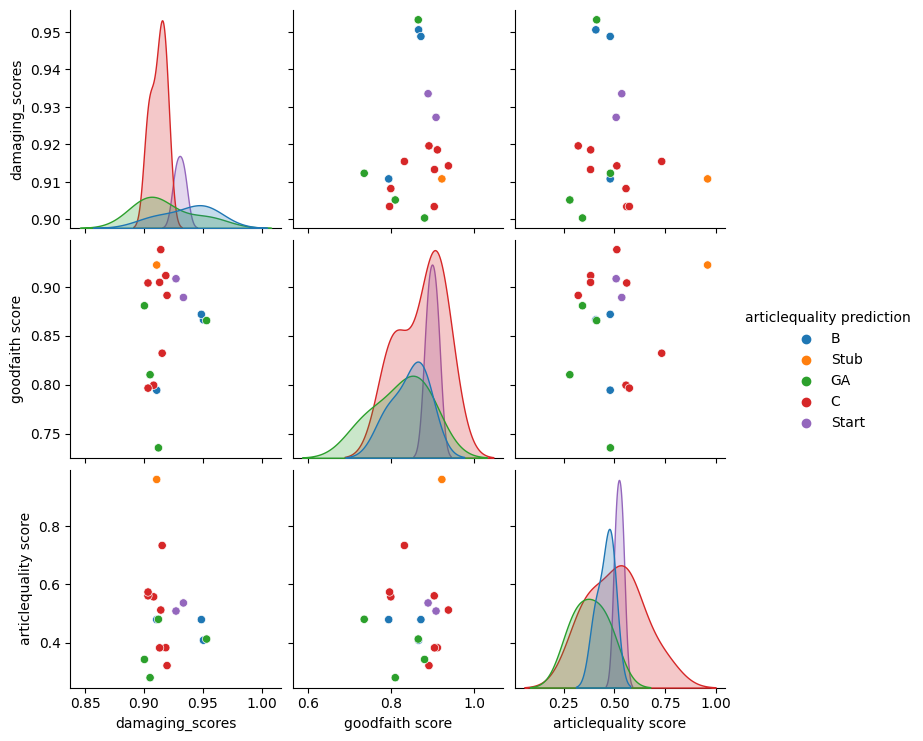

In [ ]:
#visualisation above 0.5
damaging__list, goodfaith_list, prediction1_list, articlequality_list, prediction2_list = goodfaith_articlequality(0.5)
df = pd.DataFrame(list(zip(damaging__list, goodfaith_list, prediction1_list, articlequality_list, prediction2_list)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df, hue="articlequality prediction", height=2.5) #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

#visualisation above 0.6
damaging_list1, goodfaith_list1, predicton1_list1, articlequality_list1, prediction2_list1 = goodfaith_articlequality(0.6)
df1 = pd.DataFrame(list(zip(damaging_list1, goodfaith_list1, predicton1_list1, articlequality_list1, prediction2_list1)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df1, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df1, hue="articlequality prediction", height=2.5) #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

#visualisation above 0.7
damaging_list2, goodfaith_list2, predicton1_list2, articlequality_list2, prediction2_list2 = goodfaith_articlequality(0.7)
df2 = pd.DataFrame(list(zip(damaging_list2, goodfaith_list2, predicton1_list2, articlequality_list2, prediction2_list2)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df2, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df2, hue="articlequality prediction", height=2.5) #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

#visualisation above 0.8
damaging_list3, goodfaith_list3, predicton1_list3, articlequality_list3, prediction2_list3 = goodfaith_articlequality(0.8)
df3 = pd.DataFrame(list(zip(damaging_list3, goodfaith_list3, predicton1_list3, articlequality_list3, prediction2_list3)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df3, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df3, hue="articlequality prediction", height=2.5)  #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

#visualisation above 0.9
damaging_list4, goodfaith_list4, predicton1_list4, articlequality_list4, prediction2_list4 = goodfaith_articlequality(0.9)
df4 = pd.DataFrame(list(zip(damaging_list4, goodfaith_list4, predicton1_list4, articlequality_list4, prediction2_list4)), columns =['damaging_scores', 'goodfaith score', 'goodfaith prediction', 'articlequality score', 'articlequality prediction'])
sns.pairplot(df4, hue="goodfaith prediction", height=2.5) #seaborn pairplot which goodfaith prediction in data to map plot aspects to different colors
sns.pairplot(df4, hue="articlequality prediction", height=2.5) #seaborn pairplot which article quality prediction in data to map plot aspects to different colors

# Explaining the above pairplots for different confidence levels

From the first diagram, using the 0.5 threshold, we see that the articles with high damaging scores have a false prediction in good faith. It is the assumption that editors' edits are made in good faith – that is, the assumption that people are not deliberately trying to hurt Wikipedia, even when their actions are harmful. 

From the second diagram, using the 0.5 threshold, we see from both pairplots that a good number of the articles have an article quality of a C while a few have a featured article quality, FA. note that, quality assessment as a multi-class classification task, with labels Stub ≤ Start ≤ C ≤ B ≤ GA ≤ FA.

Also, the likely damaging articles(using threshold of 0.5) have few articles of article quality Stub and a fewer article of article quality of FA.

 - At a confidence level of 0.9 and above, there are no featured articles, FA and a good number of C. Also, none of the articles were saved in good faith.

 - At a confidence level of 0.8 and above, there are a few featured articles, FA and a good number of C. Also, a few articles were saved in good faith.

 - Generally as the damaging score(confidence level) reduces, there are more articles saved in goodfaith and there is a little increase in featured articles, FA.

https://en.wikipedia.org/wiki/Wikipedia:Content_assessment